# Project Aim: To predict the mortgage backed securities prepayment risk using machine learning models

This project will provide a predictive model that can help mortgage lenders and servicers to identify prepayment-risk of loans.

### A. Problem statement understanding :

1. A mortgage-backed security (MBS) is an investment secured by a collection of mortgages bought by the banks that issued them. Mortgage-backed securities are bought and sold on the secondary market in other words MBS is a type of asset-backed security collateralised by a pool of mortgages. This essentially represents transfer of credit risk from a primary lender, typically the originating bank, to an investment bank.

2. Prepayment risk is the risk involved with the premature return of principal on a fixed-income security. When prepayment occurs, investors must reinvest at current market interest rates, which are usually substantially lower. Prepayment risk mostly affects corporate bonds and mortgage-backed securities (MBS). Prepayment is a risk for mortgage lenders and mortgage-backed securities (MBS) investors that people will pay their loans off earlier than the full term. This prevents them from getting interest payments for the long amount of time as they'd counted on.

### B. Data undrstanding:
For study purpose we have the Freddie Mac dataset. It is one of the largest mortgage financing companies in the United States.
It consist of 291451 number of rows and 28 columns.

In [1]:
# variable transformation in multile form

In [2]:
       # data processing
import pandas as pd 

        # linear algebra
import numpy as np

       #ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

        #feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from datetime import datetime


pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv(r"C:\Users\vibgyors computer\OneDrive\Desktop\Project\Technocolabs\Mortage backed loan\LoanExport.csv", low_memory=False,)


In [4]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [5]:
df.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [6]:
df['Occupancy'].value_counts()

O    276131
I      8734
S      6586
Name: Occupancy, dtype: int64

In [7]:
# 1 convertt datatype 
# object dattype -- encoding
# encoding type krishi , mene 
#lbelng - target col  choose and convert to 0 and 1

In [8]:
df.select_dtypes(include = object)

,FirstTimeHomebuyer,MSA,Occupancy,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,NumBorrowers,SellerName,ServicerName
0,N,16974,O,T,N,FRM,IL,SF,60400,F199Q1268030,P,2,FL,WASHINGTONMUTUALBANK
1,N,19740,O,R,N,FRM,CO,SF,80200,F199Q1015092,N,1,FT,CHASEHOMEFINANCELLC
2,N,29940,O,T,N,FRM,KS,SF,66000,F199Q1266886,N,2,FL,WASHINGTONMUTUALBANK
3,N,31084,O,R,N,FRM,CA,SF,90700,F199Q1178167,N,2,GM,GMACMTGECORP
4,N,35644,O,R,N,FRM,NJ,SF,7600,F199Q1178517,N,2,GM,GMACMTGECORP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,N,37964,O,R,N,FRM,PA,SF,19400,F199Q1220925,N,2,Ot,Other servicers
291447,N,35644,O,C,N,FRM,NY,SF,11600,F199Q1401332,P,2,Ot,Other servicers
291448,N,42044,O,R,N,FRM,CA,SF,92800,F199Q1401282,N,1,Ot,Other servicers
291449,N,37964,I,R,N,FRM,PA,SF,19300,F199Q1220924,P,2,Ot,Other servicers


In [9]:
df.select_dtypes(include = int)

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,202901,25,1,89,27,117000,89,360,0,0,52
1,0,199902,202901,0,1,73,17,109000,73,360,0,0,144
2,0,199902,202901,0,1,75,16,88000,75,360,0,0,67
3,0,199902,202901,0,1,76,14,160000,76,360,0,0,35
4,0,199902,202901,0,1,78,18,109000,78,360,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,202902,0,1,60,32,90000,60,360,0,0,12
291447,840,200210,202904,0,1,73,0,267000,73,319,0,0,53
291448,840,200304,202904,0,1,73,31,87000,73,313,0,0,38
291449,845,199904,202903,0,1,80,54,88000,80,360,0,0,32


In [10]:
df["MIP"].value_counts()

0     184511
25     42441
30     41869
12     13294
18      3005
17      2739
35      1290
36       748
29       640
20       497
14       166
27        66
22        45
6         32
33        24
32         9
28         9
15         7
50         7
47         7
26         7
24         6
16         5
1          5
13         4
52         3
10         3
37         3
55         1
21         1
23         1
19         1
45         1
7          1
9          1
11         1
4          1
Name: MIP, dtype: int64

In [11]:
df['OrigLoanTerm'].value_counts()

360    289073
354       434
336       205
359       103
348        94
        ...  
301         6
302         5
304         4
303         4
361         2
Name: OrigLoanTerm, Length: 61, dtype: int64

In [12]:
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [13]:
 df.shape

(291451, 28)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [15]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [16]:
df["OrigLoanTerm"].value_counts()

360    289073
354       434
336       205
359       103
348        94
        ...  
301         6
302         5
304         4
303         4
361         2
Name: OrigLoanTerm, Length: 61, dtype: int64

In [17]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


# DATA CLEANING

### Given data missing values in the column "SellerName", so replace all missing values with mode
###  Undefined values in the 'MSA' & 'NumBorrowers" column , so convert all non-numeric value to integer 0 and drop 0 values
### Undefined values in the "FirstTimeHomebuyer" & "PPM" column so dropped it.

In [18]:
len(df['SellerName'].unique())

21

In [19]:
for i in df.columns:
    print(len(df[i].unique()))

370
66
3
96
392
37
5
3
102
66
375
97
254
4
3
1
53
7
892
291451
3
61
3
21
20
2
174
212


In [20]:
df['SellerName'].value_counts()

Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64

In [21]:
 df.SellerName.value_counts().sort_values(ascending=False)

Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64

### _Replacing the missing values in 'SellerName' with mode_

In [22]:
df["SellerName"].isnull().sum()

24994

In [23]:
print(" Mode Value \n",[df['SellerName'].mode().values[0]])

 Mode Value 
 ['Ot']


In [24]:
df['SellerName'] = df['SellerName'].fillna(df['SellerName'].dropna().mode().values[0])


In [25]:
#checking if we filled missing values
df['SellerName'].isnull().sum()

0

### _Dropping undefined value ''X' in column "FirstTimeHomebuyer"_

In [26]:
df.FirstTimeHomebuyer.shape

(291451,)

In [27]:
df['FirstTimeHomebuyer'].value_counts()

N    184154
X     78015
Y     29282
Name: FirstTimeHomebuyer, dtype: int64

In [28]:
df['FirstTimeHomebuyer'].sort_values()

0         N
173805    N
173806    N
173807    N
173808    N
         ..
154817    Y
154816    Y
154815    Y
212120    Y
194891    Y
Name: FirstTimeHomebuyer, Length: 291451, dtype: object

In [29]:
df =  df[df["FirstTimeHomebuyer"]!= 'X']

In [30]:
df["FirstTimeHomebuyer"]

0         N
1         N
2         N
3         N
4         N
         ..
291446    N
291447    N
291448    N
291449    N
291450    N
Name: FirstTimeHomebuyer, Length: 213436, dtype: object

In [31]:
df["FirstTimeHomebuyer"].value_counts()

N    184154
Y     29282
Name: FirstTimeHomebuyer, dtype: int64

In [32]:
df.FirstTimeHomebuyer.shape

(213436,)

### _Dropping undefined value 'X' in column "PPM"_

In [33]:
df['PPM'].value_counts()

N    204660
X      4895
Y      3881
Name: PPM, dtype: int64

In [34]:
df =df[df['PPM']!='X']

In [35]:
df['PPM'].value_counts()

N    204660
Y      3881
Name: PPM, dtype: int64

### Dropping undefined value 'X' in column "PropertyType"

In [36]:
df.PropertyType.dtypes

dtype('O')

In [37]:
df.PropertyType.info()

<class 'pandas.core.series.Series'>
Int64Index: 208541 entries, 0 to 291450
Series name: PropertyType
Non-Null Count   Dtype 
--------------   ----- 
208541 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB


In [38]:
df.PropertyType.value_counts()

SF    171892
PU     22726
CO     13325
MH       462
CP        61
LH        54
X         21
Name: PropertyType, dtype: int64

In [39]:
df =df[df['PropertyType']!='X']

In [40]:
 df=df[df["PropertyType"]!= "X"]

In [41]:
df['PropertyType'].value_counts()

SF    171892
PU     22726
CO     13325
MH       462
CP        61
LH        54
X         21
Name: PropertyType, dtype: int64

## _Replacing non-numeric values in column "MSA" with 0, Convert to integers and drop 0 values_

In [42]:
df.MSA.shape

(208541,)

In [43]:
df.MSA.value_counts()

X        26716
31084     7114
16974     6495
12060     5094
47644     5050
         ...  
41900        3
49500        2
10380        1
25020        1
32420        1
Name: MSA, Length: 392, dtype: int64

In [44]:
df['MSA'] = pd.to_numeric(df['MSA'], errors='coerce').fillna(0).astype(int)

In [45]:
df = df[df['MSA'] != 0]

In [46]:
df.MSA.shape

(181825,)

In [47]:
df['MSA'].value_counts()

31084    7114
16974    6495
12060    5094
47644    5050
38060    4388
         ... 
41900       3
49500       2
10380       1
25020       1
32420       1
Name: MSA, Length: 391, dtype: int64

In [48]:
df['MSA'].sort_values(ascending=False)

119448    49740
228853    49740
120551    49740
195967    49740
254829    49740
          ...  
273197    10180
223356    10180
169221    10180
87483     10180
139317    10180
Name: MSA, Length: 181825, dtype: int32

In [49]:
df.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

### _Dropping undefined value 'X' in column "NumBorrowers"_

In [50]:
df.NumBorrowers.shape

(181825,)

In [51]:
df.NumBorrowers.dtypes

dtype('O')

In [52]:
df.NumBorrowers.value_counts()

2     115165
1      66521
X        139
Name: NumBorrowers, dtype: int64

In [53]:
df['NumBorrowers'] = pd.to_numeric(df['NumBorrowers'], errors='coerce').fillna(0).astype(int)

In [54]:
df = df[df['NumBorrowers']!= 0]

In [55]:
df.NumBorrowers.value_counts()

2    115165
1     66521
Name: NumBorrowers, dtype: int64

In [56]:
df.NumBorrowers.shape

(181686,)

In [57]:
df.NumBorrowers.dtypes

dtype('int32')

## Data Exploration

Firstly we need to split our data to categorical and numerical data,

using the .select_dtypes('dtype').columns.to_list() combination.

In [58]:
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()

In [59]:
len(cat)

12

In [60]:
print(cat)

['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'SellerName', 'ServicerName']


In [61]:
print([df[category].value_counts() for category in cat[1:]])

[O    175451
I      3852
S      2383
Name: Occupancy, dtype: int64, T    104783
R     76534
C       264
B       105
Name: Channel, dtype: int64, N    178046
Y      3640
Name: PPM, dtype: int64, FRM      181686
Name: ProductType, dtype: int64, CA    30102
FL    13683
MI    10311
TX    10116
IL     8770
OH     6888
GA     6404
AZ     5979
WA     5887
CO     5837
NY     5491
NJ     5059
NC     4889
PA     4565
VA     4477
MA     4396
OR     3708
IN     3555
MD     3136
MN     3114
MO     3039
UT     2864
TN     2779
WI     2677
NV     2461
AL     2411
SC     2401
KY     2180
CT     1953
LA     1461
KS     1358
IA     1050
ID     1040
OK     1039
NM      969
NE      736
NH      686
MS      553
RI      495
AR      445
DE      427
ME      382
DC      311
HI      273
MT      273
WV      248
VT      206
SD      133
WY      125
ND      125
AK      118
PR      101
Name: PropertyState, dtype: int64, SF    147877
PU     21512
CO     11894
MH       279
CP        60
LH        44
X         20
Name: P

In [62]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()

In [63]:
print(num)

['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MSA', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment']


In [64]:
len(num)

16

In [65]:
print([df[numeric].value_counts() for numeric in num[1:]])

[199905    67930
199904    56664
199903    53240
199902     1251
199906     1084
          ...  
200204        2
201111        1
201303        1
200403        1
200404        1
Name: FirstPaymentDate, Length: 63, dtype: int64, 202904    68100
202903    56693
202902    53258
202901     1250
202905     1076
          ...  
203211        1
203212        1
204302        1
204111        1
203308        1
Name: MaturityDate, Length: 89, dtype: int64, 31084    7110
16974    6495
12060    5089
47644    5050
38060    4383
         ... 
41900       3
49500       2
10380       1
25020       1
32420       1
Name: MSA, Length: 391, dtype: int64, 0     107317
30     33430
25     26832
12      7212
18      2443
17      1660
35      1004
36       678
29       581
20       228
14       145
27        49
22        26
6         16
33        12
50         7
28         6
47         5
26         5
1          4
16         4
32         4
24         3
13         3
15         2
37         2
10         2
55      

In [66]:
 df.select_dtypes('object').columns.to_list()

['FirstTimeHomebuyer',
 'Occupancy',
 'Channel',
 'PPM',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanSeqNum',
 'LoanPurpose',
 'SellerName',
 'ServicerName']

In [67]:
 df.select_dtypes('number').columns.to_list()

['CreditScore',
 'FirstPaymentDate',
 'MaturityDate',
 'MSA',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'OrigLoanTerm',
 'NumBorrowers',
 'EverDelinquent',
 'MonthsDelinquent',
 'MonthsInRepayment']

In [68]:
df['PPM'].unique()

array(['N', 'Y'], dtype=object)

In [69]:
df['PropertyState'].unique()

array(['IL', 'CO', 'KS', 'CA', 'NJ', 'GA', 'TX', 'MD', 'MA', 'SC', 'WY',
       'NC', 'AZ', 'FL', 'IN', 'MS', 'CT', 'NY', 'WA', 'AR', 'VA', 'WI',
       'MN', 'LA', 'PA', 'OR', 'RI', 'UT', 'MI', 'OH', 'NE', 'AL', 'VT',
       'HI', 'MO', 'TN', 'NV', 'PR', 'KY', 'ME', 'NH', 'NM', 'ID', 'IA',
       'MT', 'OK', 'DC', 'WV', 'ND', 'DE', 'SD', 'AK'], dtype=object)

In [70]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


# Explonatory Data Analysis

## Transformation of columns for EDA

CreditSCORE- Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900)(credit range column)

LTV -  Low','Medium','High (LTV range column)

Monthsin repayment - 0-4yrs','4-8yrs','8-12yrs', '12-16yrs', '16-20yr(Column name - Repayrange)

In [71]:
##Handling categorical feature FirstTimeHomebuyer
df["IsFirstTimeHomebuyer"] = df['FirstTimeHomebuyer'].map({"N":0,"Y":1})
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,IsFirstTimeHomebuyer
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,0
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,0
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,0
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,0
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,0


In [72]:
df['IsFirstTimeHomebuyer'].unique()

array([0, 1], dtype=int64)

In [73]:
##Transforming  Numeric feature MIP to diff range

# Create a new column to store the classifications
df['LTV_Range'] = ""

# Iterate over the values in the numeric column and assign classifications
for index, value in df['LTV'].iteritems():
    if value >= 0 and value < 25:
        df.at[index, 'LTV_Range'] = 'Low'
    elif value >= 25 and value < 50:
        df.at[index, 'LTV_Range'] = 'Medium'
    elif value >= 50 and value < 75:
        df.at[index, 'LTV_Range'] = 'High'
    elif value >= 75 and value <= 100:
        df.at[index, 'LTV_Range'] = ' Very High'
    else:
        df.at[index, 'LTV_Range'] = 'Invalid value'

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_6668\3676712315.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['LTV'].iteritems():


In [74]:
df['LTV'].value_counts().index

Int64Index([ 80,  95,  90,  75,  85,  79,  97,  78,  70,  74,  77,  73,  89,
             72,  76,  69,  71,  88,  65,  67,  68,  87,  66,  64,  60,  63,
             84,  62,  56,  86,  59,  93,  57,  61,  55,  94,  50,  83,  54,
             53,  58,  92,  52,  48,  49,  51,  47,  82,  45,  46,  44,  43,
             40,  42,  39,  38,  41,  37,  91,  34,  35,  36,  30,  33,  32,
             28,  81,  31,  27,  24,  25,  26,  29,  23,  22,  96,  20,  21,
             19,  18,  17,  16,  15,  14,  13,  12,   9,  11, 100,  10,   8,
              7,  98,   6,   0],
           dtype='int64')

In [75]:
##Transforming  Numeric feature CreditScore to diff range

# Create a new column to store the classifications
df['CreditRange'] = ""

# Iterate over the values in the numeric column and assign classifications
for index, value in df['CreditScore'].iteritems():
    if value >= 0 and value < 650:
        df.at[index, 'CreditRange'] = 'Poor'
    elif value >= 650 and value < 700:
        df.at[index, 'CreditRange'] = 'Fair'
    elif value >= 700 and value < 750:
        df.at[index, 'CreditRange'] = 'Good'
    elif value >= 750 and value <= 900:
        df.at[index, 'CreditRange'] = 'Excellent'
    else:
        df.at[index, 'CreditRange'] = 'Invalid value'

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_6668\3662517667.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['CreditScore'].iteritems():


In [76]:
df['MIP'].value_counts()

0     107317
30     33430
25     26832
12      7212
18      2443
17      1660
35      1004
36       678
29       581
20       228
14       145
27        49
22        26
6         16
33        12
50         7
28         6
47         5
26         5
1          4
16         4
32         4
24         3
13         3
15         2
37         2
10         2
55         1
21         1
11         1
7          1
52         1
4          1
Name: MIP, dtype: int64

In [77]:
df['MIP'].value_counts()

0     107317
30     33430
25     26832
12      7212
18      2443
17      1660
35      1004
36       678
29       581
20       228
14       145
27        49
22        26
6         16
33        12
50         7
28         6
47         5
26         5
1          4
16         4
32         4
24         3
13         3
15         2
37         2
10         2
55         1
21         1
11         1
7          1
52         1
4          1
Name: MIP, dtype: int64

In [78]:
##Transforming  Numeric feature MonthsInRepayment to diff range

# Create a new column to store the classifications
df['RepPayRange'] = ""

# Iterate over the values in the numeric column and assign classifications
for index, value in df['MonthsInRepayment'].iteritems():
    if value >= 0 and value < 48:
        df.at[index, 'RepPayRange'] = '0-4yrs'
    elif value >= 48 and value < 96:
        df.at[index, 'RepPayRange'] = '4-8yrs'
    elif value >= 96 and value < 144:
        df.at[index, 'RepPayRange'] = '8-12yrs'
    elif value >= 144 and value < 192:
        df.at[index, 'RepPayRange'] = '12-16yrs'
    elif value >= 192 and value < 240:
        df.at[index, 'RepPayRange'] = '16-20yrs'
    else:
        df.at[index, 'RepPayRange'] = 'Invalid value'

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_6668\1963786405.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df['MonthsInRepayment'].iteritems():


In [79]:
df["RepPayRange"].value_counts()

0-4yrs      89448
4-8yrs      67169
8-12yrs     11180
12-16yrs     7319
16-20yrs     6570
Name: RepPayRange, dtype: int64

In [80]:
df.head(100000)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,0,Very High,Poor,4-8yrs
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,0,High,Poor,12-16yrs
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,0,Very High,Poor,4-8yrs
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,0,Very High,Poor,0-4yrs
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,0,Very High,Poor,4-8yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161128,725,199904,Y,202903,16740,0,1,O,79,33,171000,79,6.625,R,N,FRM,NC,SF,28200,F199Q1246534,P,360,2,FI,WELLSFARGOBANKNA,0,0,73,1,Very High,Good,4-8yrs
161129,725,199904,Y,202903,16974,0,1,O,94,0,230000,94,6.750,R,N,FRM,IL,SF,60000,F199Q1289730,P,360,2,ST,ABNAMROMTGEGROUPINC,0,0,9,1,Very High,Good,0-4yrs
161130,725,199904,Y,202903,17140,30,1,O,95,36,114000,95,6.750,R,N,FRM,OH,SF,45000,F199Q1013473,P,360,1,Ot,WASHINGTONMUTUALBANK,0,0,68,1,Very High,Good,4-8yrs
161131,725,199904,Y,202903,18140,0,1,O,80,36,114000,80,6.000,T,N,FRM,OH,SF,43100,F199Q1039374,P,360,1,NO,WELLSFARGOBANKNA,0,0,142,1,Very High,Good,8-12yrs


In [81]:
# Convert the date columns to datetime format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'],format='%Y%m')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')
# Calculate the difference in months
df['Month_Difference'] = (df['MaturityDate'].dt.to_period('M') - df['FirstPaymentDate'].dt.to_period('M')).apply(lambda x: x.n)

In [82]:
df["Month_Difference"].value_counts()

359    180402
353       278
335        87
358        51
347        47
        ...  
321         3
301         3
303         2
302         2
360         1
Name: Month_Difference, Length: 61, dtype: int64

In [83]:
df.head(1000)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange,Month_Difference
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,0,Very High,Poor,4-8yrs,359
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,0,High,Poor,12-16yrs,359
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,0,Very High,Poor,4-8yrs,359
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,0,Very High,Poor,0-4yrs,359
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,0,Very High,Poor,4-8yrs,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,534,1999-03-01,N,2029-02-01,43340,0,1,O,66,52,206000,66,6.875,R,N,FRM,LA,SF,71100,F199Q1179670,C,360,2,GM,GMACMTGECORP,1,2,75,0,High,Poor,4-8yrs,359
1602,534,1999-04-01,N,2029-03-01,16974,30,1,O,95,29,152000,95,6.750,T,N,FRM,IL,CO,60600,F199Q1223754,P,360,1,Ot,Other servicers,0,0,24,0,Very High,Poor,0-4yrs,359
1603,534,1999-04-01,N,2029-03-01,26620,0,1,O,75,22,100000,75,6.500,R,N,FRM,AL,SF,35800,F199Q1174584,P,360,2,Ot,Other servicers,0,0,20,0,Very High,Poor,0-4yrs,359
1604,534,1999-04-01,N,2029-03-01,28140,0,1,O,75,53,138000,75,7.500,T,N,FRM,MO,SF,64000,F199Q1122209,N,360,2,GM,GMACMTGECORP,0,0,40,0,Very High,Poor,0-4yrs,359


In [84]:
#Dropping columns that got transformed
df.drop(['FirstTimeHomebuyer','LTV','MonthsInRepayment',"CreditScore","FirstPaymentDate","MaturityDate"],axis=1, inplace=True)


In [85]:
df.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange,Month_Difference
0,16974,25,1,O,89,27,117000,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,0,Very High,Poor,4-8yrs,359
1,19740,0,1,O,73,17,109000,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,0,High,Poor,12-16yrs,359
2,29940,0,1,O,75,16,88000,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,0,Very High,Poor,4-8yrs,359
3,31084,0,1,O,76,14,160000,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,0,Very High,Poor,0-4yrs,359
4,35644,0,1,O,78,18,109000,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,0,Very High,Poor,4-8yrs,359


## Data Visualization
### Univariate Plots
For starters we will create countplots for the categorical columns:

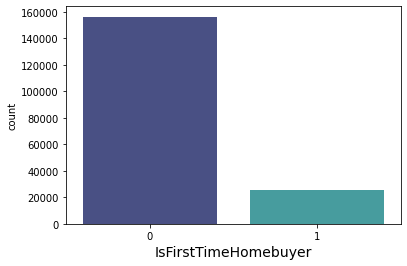

In [86]:
#categorical columns:
plt.figure(figsize=(6,4))
sns.countplot(x='IsFirstTimeHomebuyer' , data=df ,palette='mako')
plt.xlabel('IsFirstTimeHomebuyer', fontsize=14)
plt.show()

In [87]:
# mostly borrowers are not "first time homebuyer"

In [88]:
df.Occupancy.value_counts()

O    175451
I      3852
S      2383
Name: Occupancy, dtype: int64

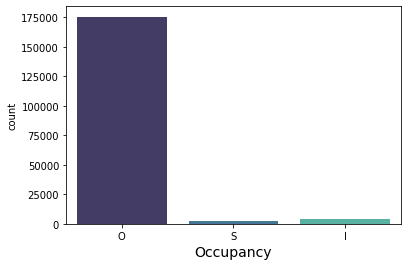

In [89]:
#categorical columns:
plt.figure(figsize=(6,4))
sns.countplot(x='Occupancy' , data=df ,palette='mako')
plt.xlabel('Occupancy', fontsize=14)
plt.show()

In [90]:
# property occupancy status at the time the loan was mostly Primary Residence('O')
# By a wide margin Primary Residence is the  property occupancy status


In [91]:
df['Channel'].value_counts()

T    104783
R     76534
C       264
B       105
Name: Channel, dtype: int64

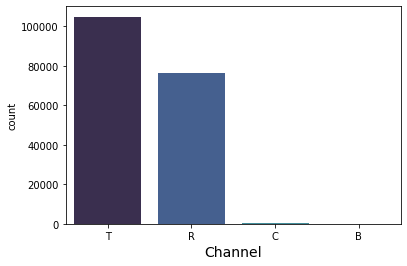

In [92]:
#categorical columns:
plt.figure(figsize=(6,4))
sns.countplot(x='Channel' , data=df ,palette='mako')
plt.xlabel('Channel', fontsize=14)
plt.show()

In [93]:
# mostly loan delivered to the issuer by Third Party Origination ("T")

In [94]:
df.PPM.value_counts()

N    178046
Y      3640
Name: PPM, dtype: int64

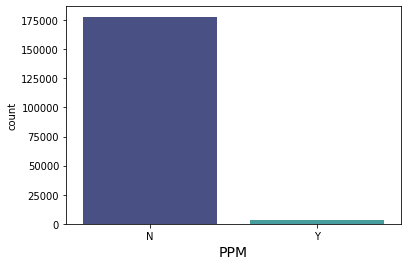

In [95]:
#categorical columns:
plt.figure(figsize=(6,4))
sns.countplot(x='PPM' , data=df ,palette='mako')
plt.xlabel('PPM', fontsize=14)
plt.show()

In [96]:
# mostly borrowers is not subject to a penalty for early payment of principle

In [97]:
# product type 'FRM' is same for all the borrowers so we can drop this column

In [98]:
cat = df.select_dtypes('object').columns.to_list()
print(cat)

['Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'SellerName', 'ServicerName', 'LTV_Range', 'CreditRange', 'RepPayRange']


In [99]:
# # categorical columns:
# plt.figure(figsize=(20,3))
# sns.countplot(x='LoanSeqNum', data=df ,palette='mako')
# plt.xlabel('LoanSeqNum', fontsize=14)
# plt.show()

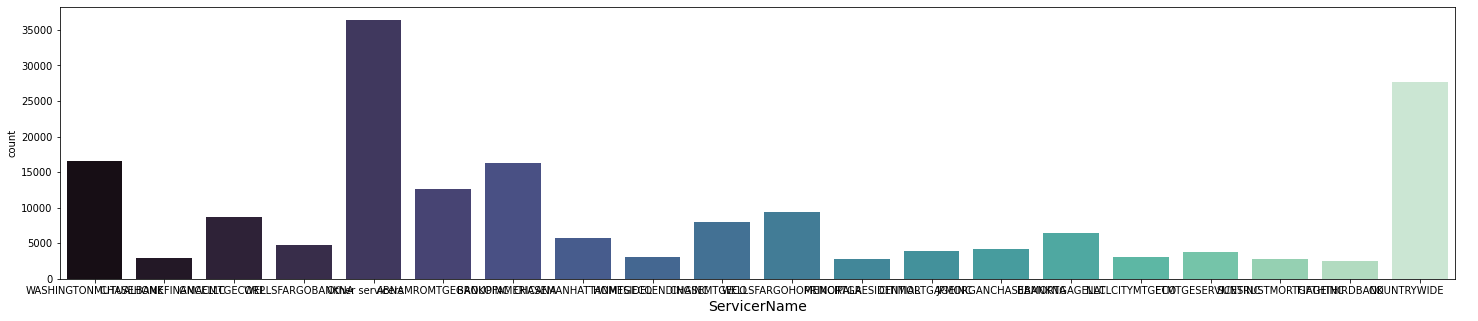

In [100]:
#categorical columns:
plt.figure(figsize=(25,5))
sns.countplot(x='ServicerName', data=df ,palette='mako')
plt.xlabel('ServicerName', fontsize=14)
plt.show()

In [101]:
# #categorical columns:
# plt.figure(figsize=(20,3))
# sns.countplot(x='PostalCode', data=df ,palette='mako')
# plt.xlabel('PostalCode', fontsize=14)
# plt.show()

In [102]:
df.select_dtypes('object').columns.to_list()

['Occupancy',
 'Channel',
 'PPM',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanSeqNum',
 'LoanPurpose',
 'SellerName',
 'ServicerName',
 'LTV_Range',
 'CreditRange',
 'RepPayRange']

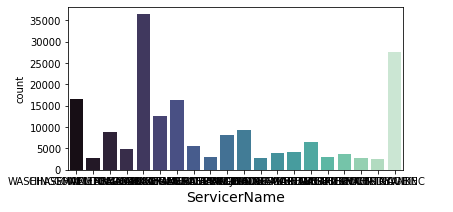

In [103]:
#categorical columns:
plt.figure(figsize=(6,3))
sns.countplot(x='ServicerName', data=df ,palette='mako')
plt.xlabel('ServicerName', fontsize=14)
plt.show()

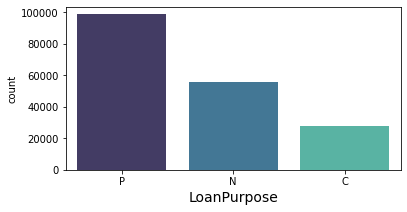

In [104]:
#categorical columns:
plt.figure(figsize=(6,3))
sns.countplot(x='LoanPurpose', data=df ,palette='mako')
plt.xlabel('LoanPurpose', fontsize=14)
plt.show()

In [105]:
# mostly purchase['P'] is the purpose of the loan

In [106]:
df.PropertyType.value_counts()

SF    147877
PU     21512
CO     11894
MH       279
CP        60
LH        44
X         20
Name: PropertyType, dtype: int64

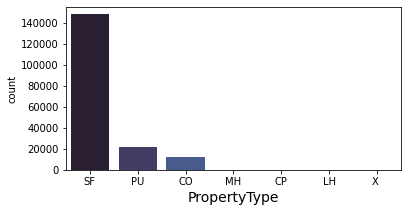

In [107]:
#categorical columns:
plt.figure(figsize=(6,3))
sns.countplot(x='PropertyType' , data=df ,palette='mako')
plt.xlabel('PropertyType', fontsize=14)
plt.show()

In [108]:
# Most of the property type is single- Family ('SF')

In [109]:
df.NumBorrowers.value_counts()

2    115165
1     66521
Name: NumBorrowers, dtype: int64

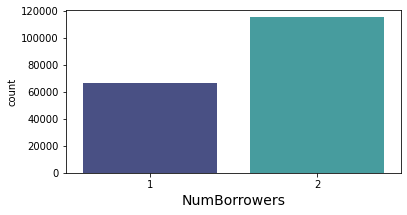

In [110]:
#categorical columns:
plt.figure(figsize=(6,3))
sns.countplot(x='NumBorrowers' , data=df ,palette='mako')
plt.xlabel('NumBorrowers', fontsize=14)
plt.show()

In [111]:
#  Data contain mostly 2 borrowers who are obligated to repay the loan

In [112]:
df.SellerName.value_counts()

Ot    59802
CO    30897
ST    19464
FL    12754
NO    10412
FI     7398
GM     5488
BI     5205
G      4409
CH     4003
CR     3808
FT     3645
PR     3001
AC     2586
OL     2382
BA     2155
WA     1571
HO      995
PN      939
RE      772
Name: SellerName, dtype: int64

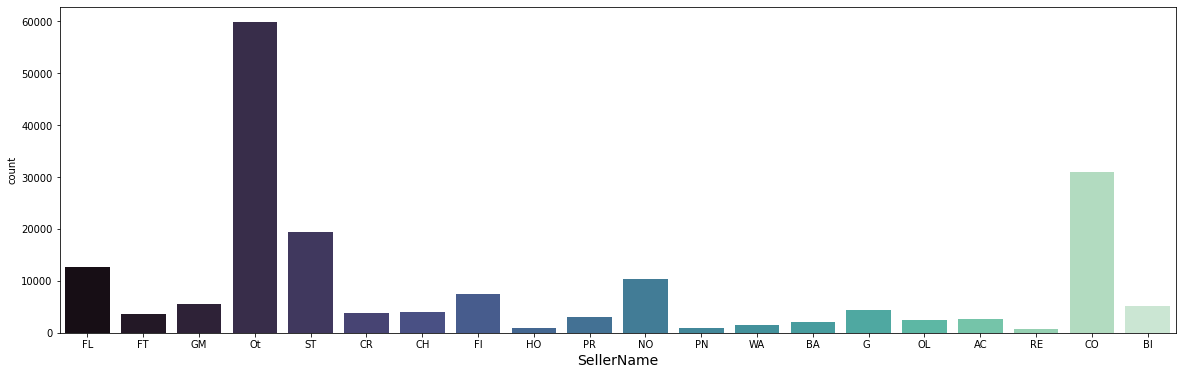

In [113]:
#categorical columns:
plt.figure(figsize=(20,6))
sns.countplot(x='SellerName' , data=df ,palette='mako')
plt.xlabel('SellerName', fontsize=14)
plt.show()

In [114]:
# sellername 'ot' mostly sold the loan to the issuer

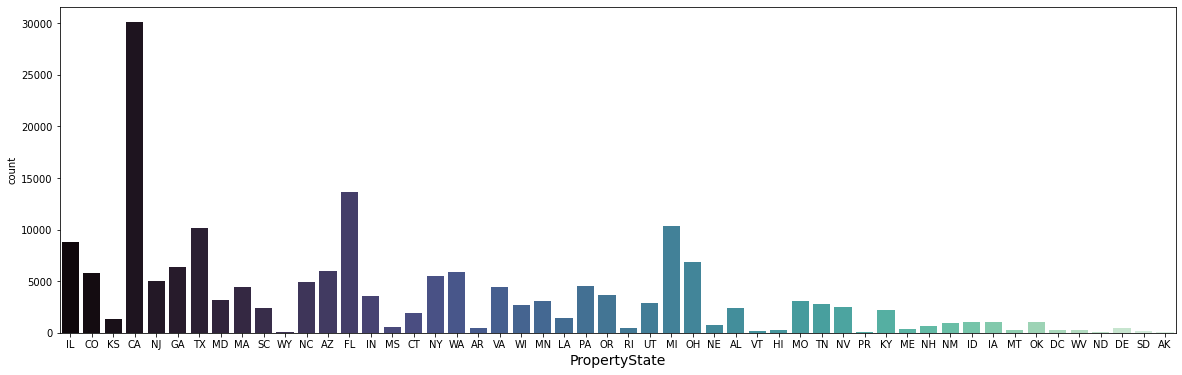

In [115]:
#categorical columns:
plt.figure(figsize=(20,6))
sns.countplot(x='PropertyState' , data=df ,palette='mako')
plt.xlabel('PropertyState', fontsize=14)
plt.show()

In [116]:
# CA is the location of the property securing the most loan

In [117]:
df.columns

Index(['MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'IsFirstTimeHomebuyer',
       'LTV_Range', 'CreditRange', 'RepPayRange', 'Month_Difference'],
      dtype='object')

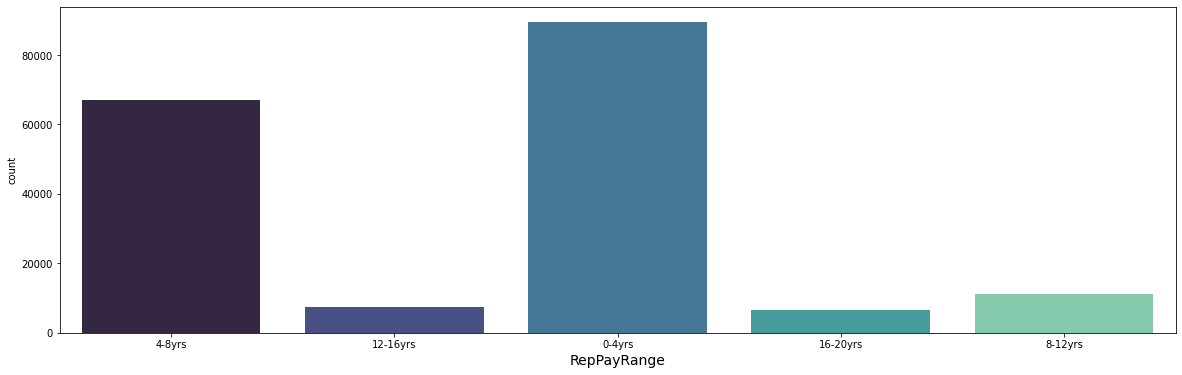

In [118]:
#categorical columns:
plt.figure(figsize=(20,6))
sns.countplot(x='RepPayRange' , data=df ,palette='mako')
plt.xlabel('RepPayRange', fontsize=14)
plt.show()

In [119]:
# #categorical columns:
# plt.figure(figsize=(20,6))
# sns.countplot(x='MIP_Range' , data=df ,palette='mako')
# plt.xlabel('MIP_Range', fontsize=14)
# plt.show()

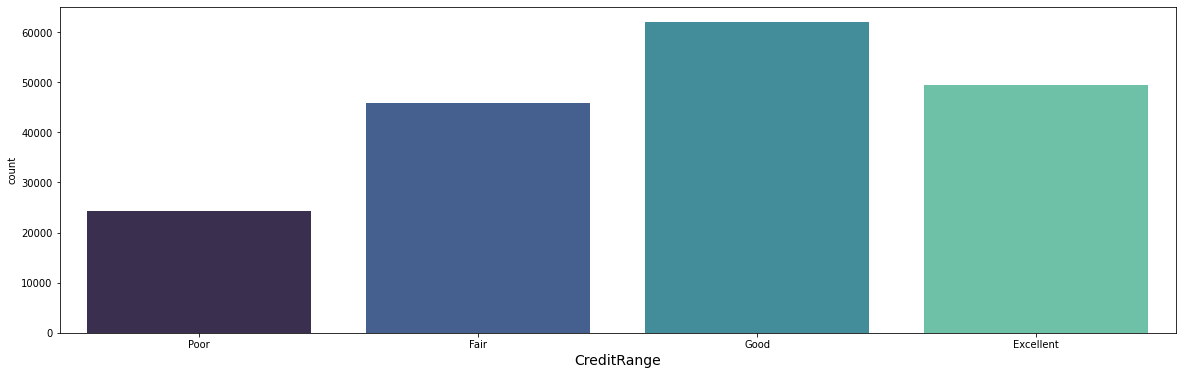

In [120]:
#categorical columns:
plt.figure(figsize=(20,6))
sns.countplot(x='CreditRange' , data=df ,palette='mako')
plt.xlabel('CreditRange', fontsize=14)
plt.show()

In [121]:
# #categorical columns:
# plt.figure(figsize=(20,6))
# sns.countplot(x='LTV_Range' , data=df ,palette='mako')
# plt.xlabel('LTV_Range', fontsize=14)
# plt.show()

In [122]:
# #categorical columns:
# plt.figure(figsize=(20,6))
# sns.countplot(x='DTI_Range' , data=df ,palette='mako')
# plt.xlabel('DTI_Range', fontsize=14)
# plt.show()

In [123]:
df.PropertyState.value_counts()

CA    30102
FL    13683
MI    10311
TX    10116
IL     8770
OH     6888
GA     6404
AZ     5979
WA     5887
CO     5837
NY     5491
NJ     5059
NC     4889
PA     4565
VA     4477
MA     4396
OR     3708
IN     3555
MD     3136
MN     3114
MO     3039
UT     2864
TN     2779
WI     2677
NV     2461
AL     2411
SC     2401
KY     2180
CT     1953
LA     1461
KS     1358
IA     1050
ID     1040
OK     1039
NM      969
NE      736
NH      686
MS      553
RI      495
AR      445
DE      427
ME      382
DC      311
HI      273
MT      273
WV      248
VT      206
SD      133
WY      125
ND      125
AK      118
PR      101
Name: PropertyState, dtype: int64

## Categoric columns realizations

1.  mostly borrowers are not "first time homebuyer"
2. By a wide margin Primary Residence is the  property occupancy status.
3.  mostly loan delivered to the issuer by Third Party Origination ("T")
4. mostly borrowers is not subject to a penalty for early payment of principle
5. mostly purchase['P'] is the purpose of the loan
6.  Most of the property type is single- Family ('SF')
7.  Data contain mostly 2 borrowers who are obligated to repay the loan
8. sellername 'ot' mostly sold the loan to the issuer
9. CA is the location of the property securing the most loan in Propertystate column

# Multivariate plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


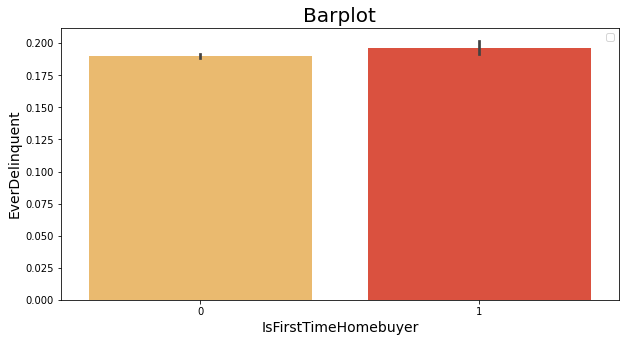

In [124]:
plt.figure(figsize=(10,5))
sns.barplot(x='IsFirstTimeHomebuyer' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('IsFirstTimeHomebuyer', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()


In [125]:
#   both FirstTimeHomebuyer and not FirstTimeHomebuyer 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


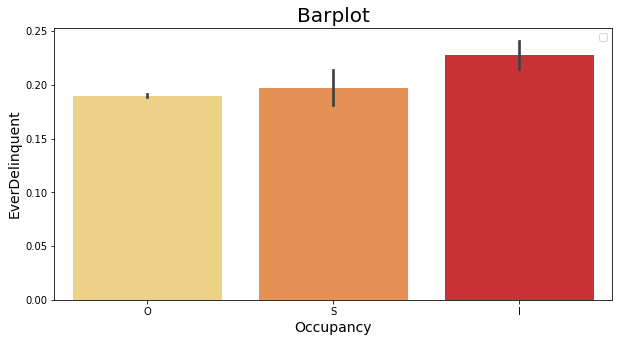

In [126]:
plt.figure(figsize=(10,5))
sns.barplot(x='Occupancy' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('Occupancy', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [127]:
# delinquent are more for the  Investment Property('I')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


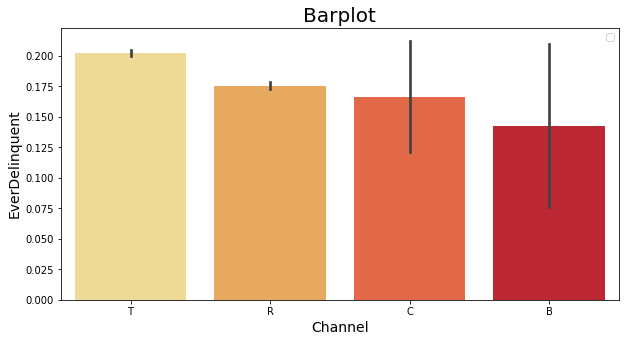

In [128]:
plt.figure(figsize=(10,5))
sns.barplot(x='Channel' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('Channel', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [129]:
# loan issued by the third party organisation  having more delinquent

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


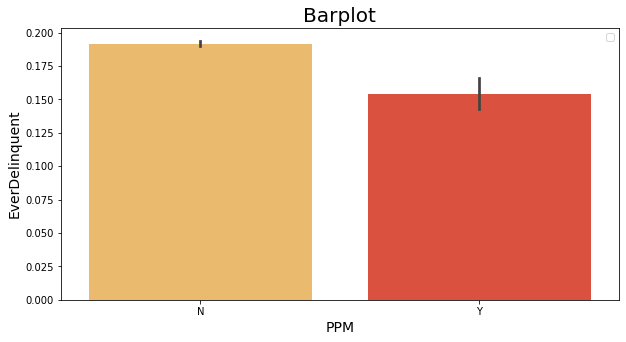

In [130]:
plt.figure(figsize=(10,5))
sns.barplot(x='PPM' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('PPM', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [131]:
# those who are  not subject to Prepayment penalty are more delinquent

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


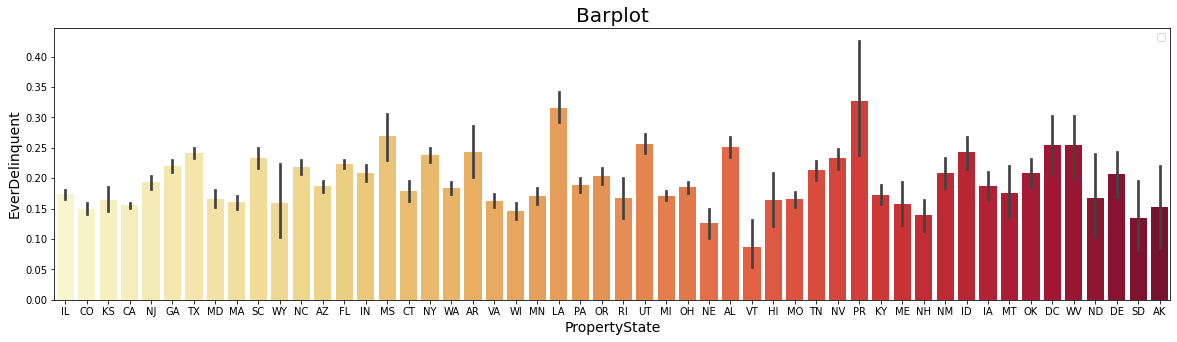

In [132]:
plt.figure(figsize=(20,5))
sns.barplot(x='PropertyState' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('PropertyState', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [133]:
# Propertystate PR & LA are more delinquent 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


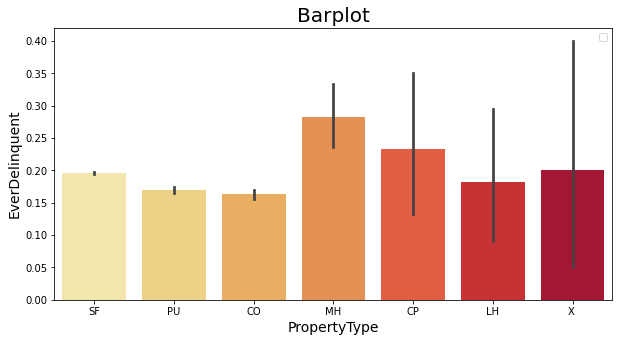

In [134]:
plt.figure(figsize=(10,5))
sns.barplot(x='PropertyType' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('PropertyType', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [135]:
# PropertyType " manufactured housing" MH is more delinquent.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


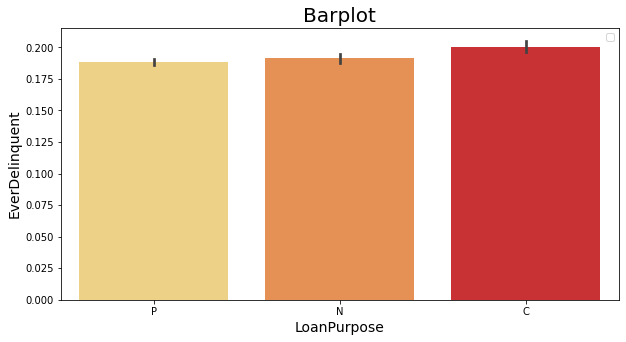

In [136]:
plt.figure(figsize=(10,5))
sns.barplot(x='LoanPurpose' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('LoanPurpose', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [137]:
# Refinance- Cash Out loan  is slightly more delinquent 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


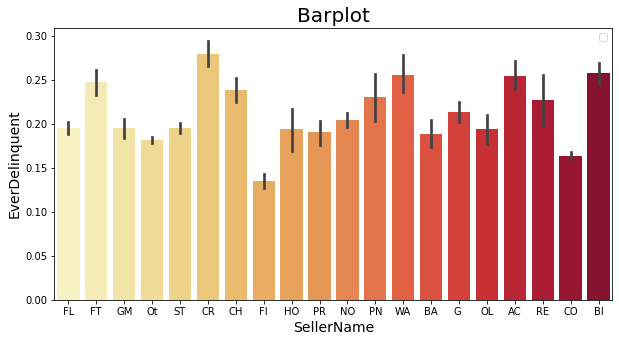

In [138]:
plt.figure(figsize=(10,5))
sns.barplot(x='SellerName' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('SellerName', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [139]:
# loan issued by sellerName "CR" is having more delinquenta

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


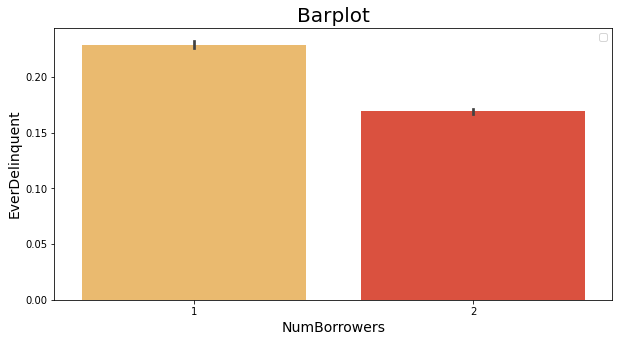

In [140]:
plt.figure(figsize=(10,5))
sns.barplot(x='NumBorrowers' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('NumBorrowers', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [141]:
#single num borrowers are more delinquent 

In [142]:
df["ServicerName"].value_counts()

Other servicers         36394
COUNTRYWIDE             27676
WASHINGTONMUTUALBANK    16583
BANKOFAMERICANA         16270
ABNAMROMTGEGROUPINC     12621
WELLSFARGOHOMEMORTGA     9438
GMACMTGECORP             8759
CHASEMTGECO              8041
BAMORTGAGELLC            6471
CHASEMANHATTANMTGECO     5676
WELLSFARGOBANKNA         4784
JPMORGANCHASEBANKNA      4195
CITIMORTGAGEINC          3882
FTMTGESERVICESINC        3776
NATLCITYMTGECO           3082
HOMESIDELENDINGINC       3006
CHASEHOMEFINANCELLC      2861
SUNTRUSTMORTGAGEINC      2845
PRINCIPALRESIDENTIAL     2808
FIFTHTHIRDBANK           2518
Name: ServicerName, dtype: int64

In [143]:
len(df["ServicerName"].value_counts())

20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


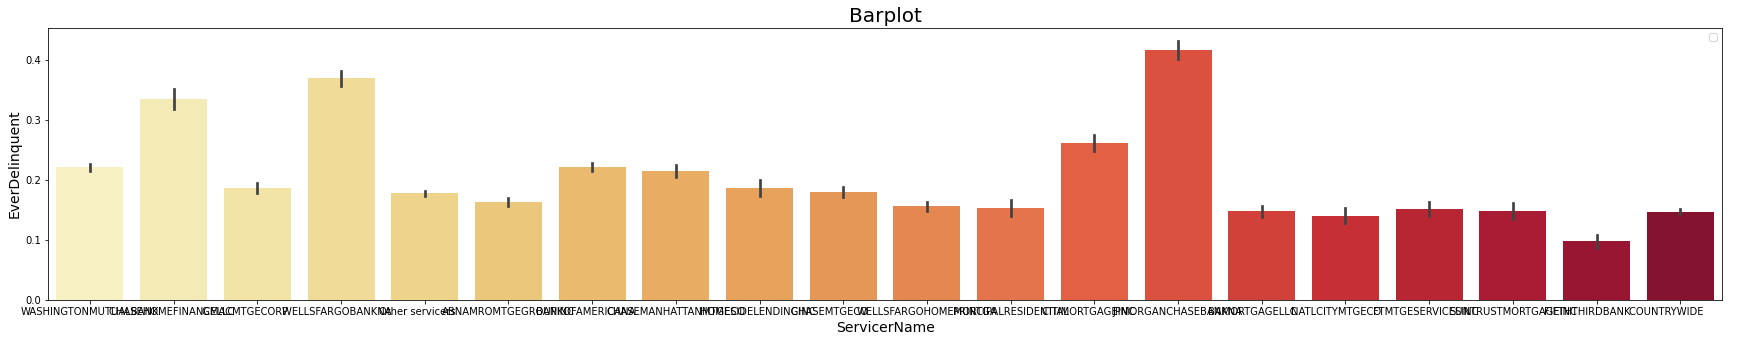

In [144]:
plt.figure(figsize=(30,5))
sns.barplot(x='ServicerName' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('ServicerName', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [145]:
# servicename "GMACMTGECORP" is having more delinquent           

In [146]:
df.columns

Index(['MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'IsFirstTimeHomebuyer',
       'LTV_Range', 'CreditRange', 'RepPayRange', 'Month_Difference'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


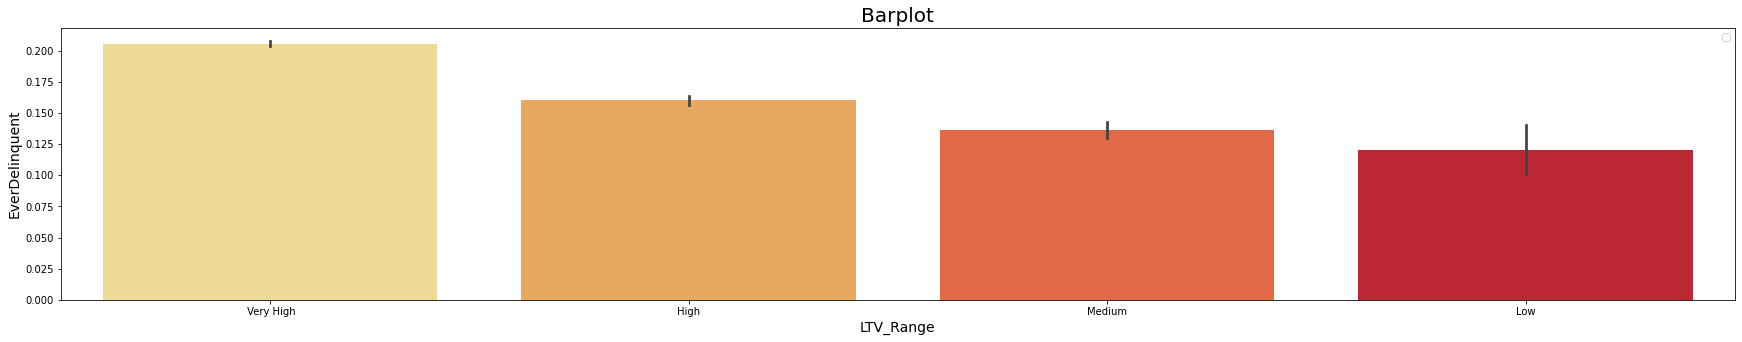

In [147]:
plt.figure(figsize=(30,5))
sns.barplot(x='LTV_Range' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('LTV_Range', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [148]:
#very high LTV are more delinquent

In [149]:
# plt.figure(figsize=(30,5))
# sns.barplot(x='DTI_Range' ,y='EverDelinquent', data=df ,palette='YlOrRd')
# plt.xlabel('DTI_Range', fontsize=14)
# plt.ylabel('EverDelinquent',fontsize=14)
# plt.legend()
# plt.title('Barplot', fontsize=20)
# plt.show()

In [150]:
# high DTI are slightly more delinquent 

In [151]:
# plt.figure(figsize=(30,5))
# sns.barplot(x='MIP_Range' ,y='EverDelinquent', data=df ,palette='YlOrRd')
# plt.xlabel('MIP_Range', fontsize=14)
# plt.ylabel('EverDelinquent',fontsize=14)
# plt.legend()
# plt.title('Barplot', fontsize=20)
# plt.show()

In [152]:
# high MIP is more delinquent

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


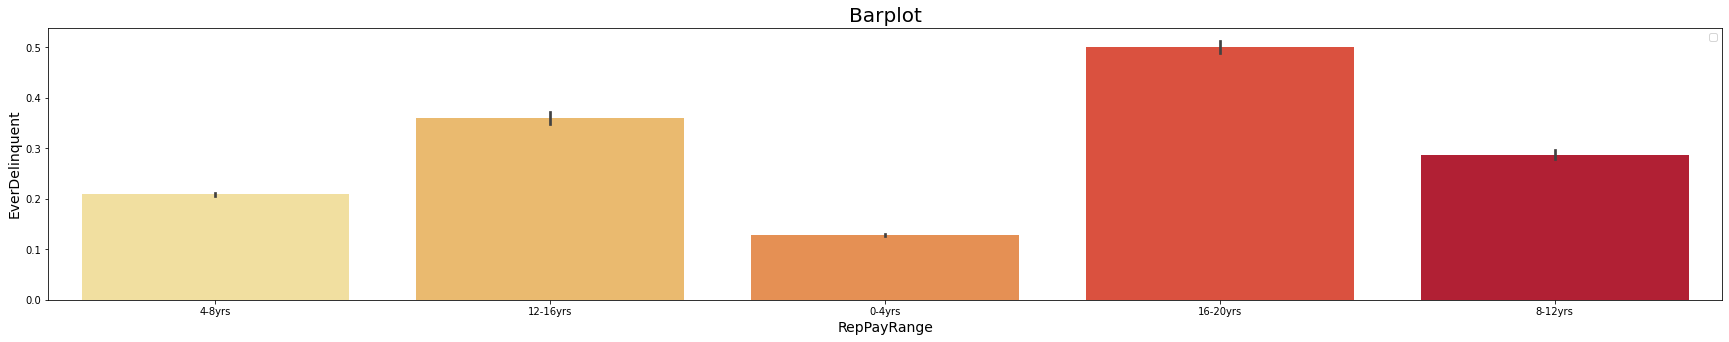

In [153]:
plt.figure(figsize=(30,5))
sns.barplot(x='RepPayRange' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('RepPayRange', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [154]:
#  borrowers having 16-20 yrs for repayment  are more delinquent.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


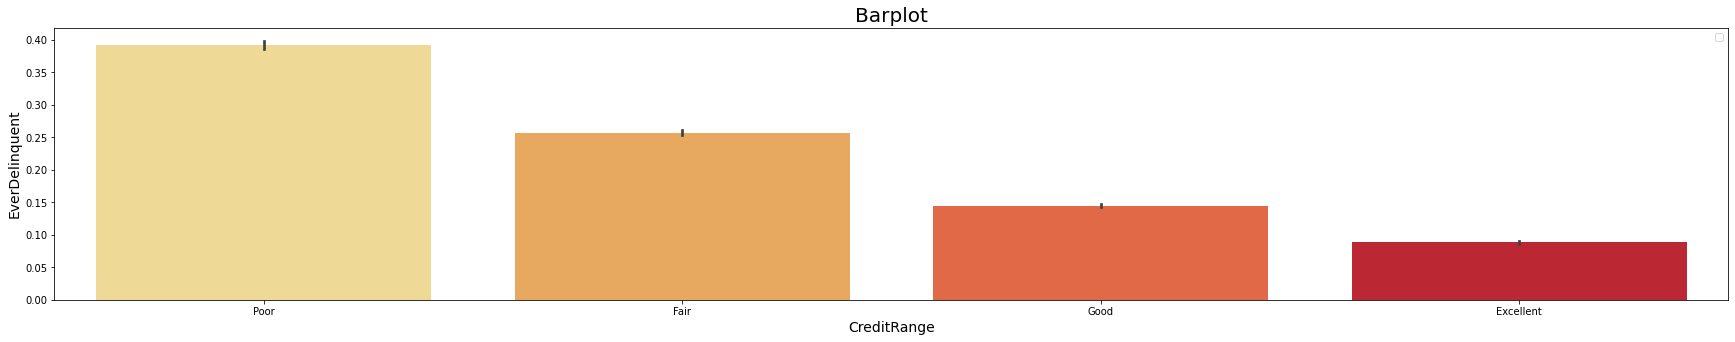

In [155]:
plt.figure(figsize=(30,5))
sns.barplot(x='CreditRange' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('CreditRange', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [156]:
# poor credit score (0-650) are more delinquent

In [157]:
df.select_dtypes('object').columns.to_list()

['Occupancy',
 'Channel',
 'PPM',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanSeqNum',
 'LoanPurpose',
 'SellerName',
 'ServicerName',
 'LTV_Range',
 'CreditRange',
 'RepPayRange']

In [158]:
df.select_dtypes('number').columns.to_list()

['MSA',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'OrigInterestRate',
 'OrigLoanTerm',
 'NumBorrowers',
 'EverDelinquent',
 'MonthsDelinquent',
 'IsFirstTimeHomebuyer',
 'Month_Difference']

In [159]:
len(df.select_dtypes("object").columns.to_list())

14

## Observations
1. FirstTimeHomebuyer are slightly higher delinquent.
2. Delinquent are more for the  Investment Property('I') in 'occupation' column.
3. loan issued by the third party organisation in channel column having more delinquent.
4. those who are  not subject to Prepayment penalty are more delinquent in PPM' column.
5. Refinance- Cash Out loan  is slightly more delinquent in loan purpose column.
6. PropertyType " manufactured housing" MH is more delinquent.
7. single num borrowers are more delinquent
8. loan issued by sellerName "CR" is having more delinquent
9. PR & LA are more delinquent in Propertystate column.

10. poor credit score (0-650) are more delinquent
11. borrowers having 16-20 yrs for repayment  are more delinquent.
12. high MIP is more delinquent.
13. high DTI are slightly more delinquent

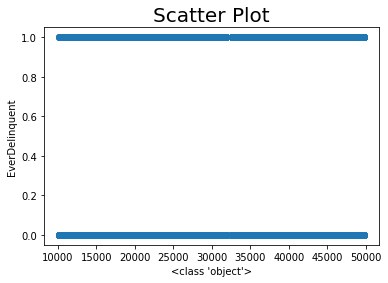

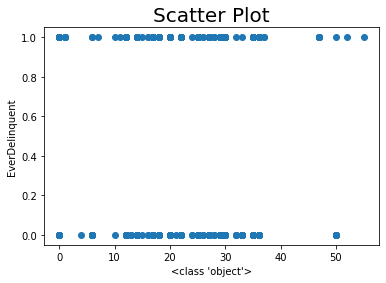

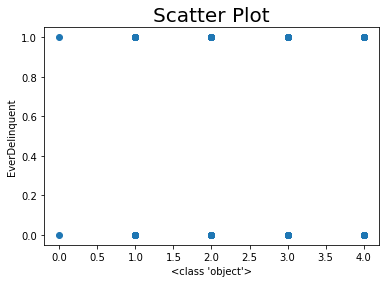

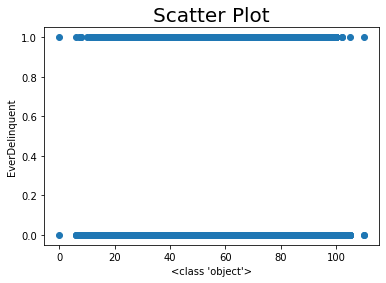

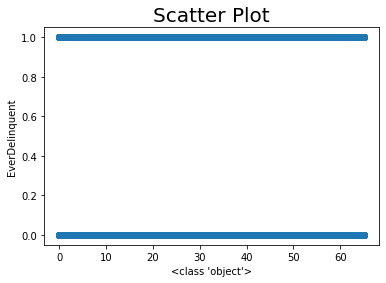

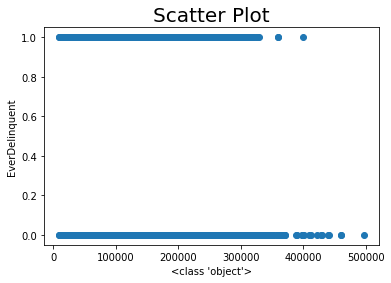

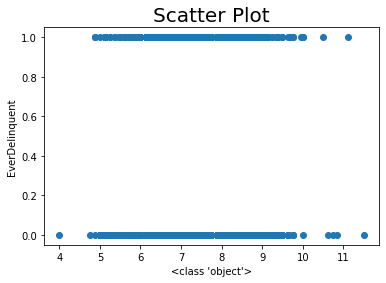

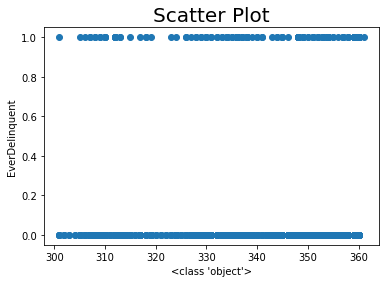

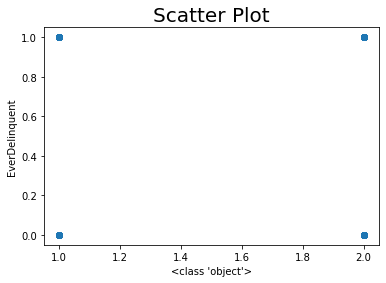

In [160]:
num = df.select_dtypes('number').columns.to_list()
BM_num =df[num]
for numeric in BM_num[num[:9]]:
    plt.scatter(BM_num[numeric], BM_num['EverDelinquent'])
    plt.title("Scatter Plot", fontsize=20) 
    plt.xlabel(object)
    plt.ylabel('EverDelinquent')
    plt.show()

## Data Visualization
### Univariate Plots
we will create distplots for the numberical columns:

In [161]:
df.select_dtypes('number').columns.to_list()

['MSA',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'OrigInterestRate',
 'OrigLoanTerm',
 'NumBorrowers',
 'EverDelinquent',
 'MonthsDelinquent',
 'IsFirstTimeHomebuyer',
 'Month_Difference']

In [162]:
len(df.select_dtypes('number').columns.to_list())

13

In [163]:
sns.set()

### NumBorrowers

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_6668\2846052862.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumBorrowers'])


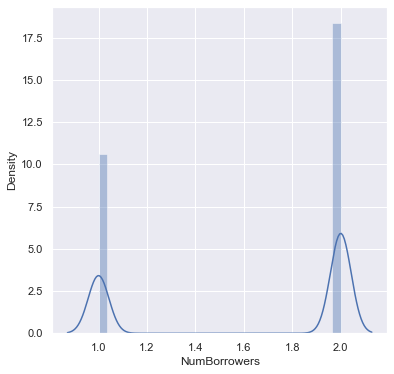

In [164]:
plt.figure(figsize=(6,6))
sns.distplot(df['NumBorrowers'])
plt.show()

### EverDelinquent

In [165]:
# plt.figure(figsize=(6,6))
# sns.distplot(df['EverDelinquent'])
# plt.show()

In [166]:
df["EverDelinquent"].value_counts()

0    146979
1     34707
Name: EverDelinquent, dtype: int64

In [167]:
df["MonthsDelinquent"].value_counts()

0      146979
1       14262
2        4535
3        2328
4        1447
        ...  
139         1
138         1
165         1
160         1
171         1
Name: MonthsDelinquent, Length: 166, dtype: int64

### MonthsDelinquent

In [168]:
# plt.figure(figsize=(6,6))
# sns.distplot(df['MonthsDelinquent'])
# plt.show()

### Month_Difference

In [169]:
# plt.figure(figsize=(6,6))
# sns.distplot(df['Month_Difference'])
# plt.show()

### OrigUPB

In [170]:
# plt.figure(figsize=(6,6))
# sns.distplot(df['OrigUPB'])
# plt.show()

In [171]:
# plt.figure(figsize=(6,6))
# sns.displot(df['OrigUPB'])
# plt.show()

### LTV

In [172]:
# plt.figure(figsize=(6,6))
# sns.distplot(df['LTV'])
# plt.show()

In [173]:
# plt.figure(figsize=(6,6))
# sns.displot(df['LTV'])
# plt.show()

### OrigInterestRate

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_6668\2710683861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OrigInterestRate'])


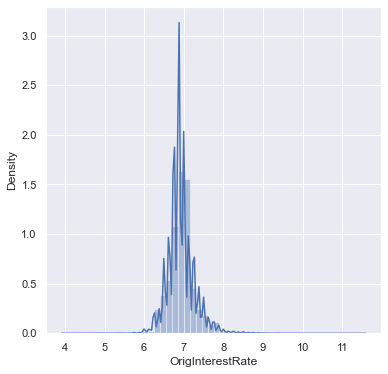

In [174]:
plt.figure(figsize=(6,6))
sns.distplot(df['OrigInterestRate'])
plt.show()

### OCLTV

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_6668\2284401866.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OCLTV'])


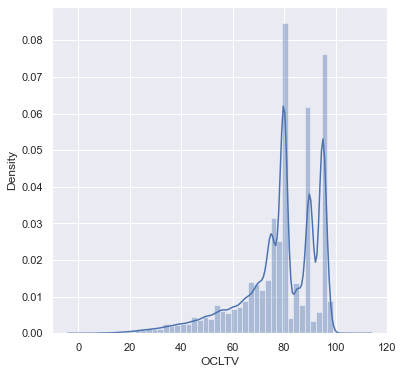

In [175]:
plt.figure(figsize=(6,6))
sns.distplot(df['OCLTV'])
plt.show()

<Figure size 432x432 with 0 Axes>

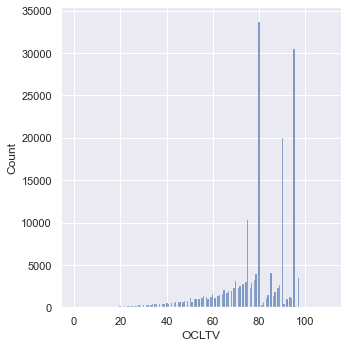

In [176]:
plt.figure(figsize=(6,6))
sns.displot(df['OCLTV'])
plt.show()

### Units

In [177]:
df['Units'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [178]:
df.shape

(181686, 27)

In [179]:
df.Units.dtypes

dtype('int64')

In [180]:
df.Units.value_counts()

1    179110
2      2107
4       249
3       218
0         2
Name: Units, dtype: int64

In [181]:
# plt.figure(figsize=(6,6))
# sns.distplot(df['Units'])
# plt.show()

### MIP

In [182]:
# plt.figure(figsize=(6,6))
# sns.distplot(df['MIP'])
# plt.show()

In [183]:
# plt.figure(figsize=(6,6))
# sns.displot(df['MIP'])
# plt.show()

### MSA

In [184]:
# plt.figure(figsize=(6,6))
# sns.displot(df['MSA'])
# plt.show()

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_6668\4178567522.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MSA'])


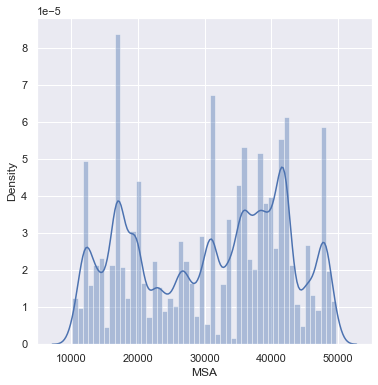

In [185]:
plt.figure(figsize=(6,6))
sns.distplot(df['MSA'])
plt.show()

### CreditScore

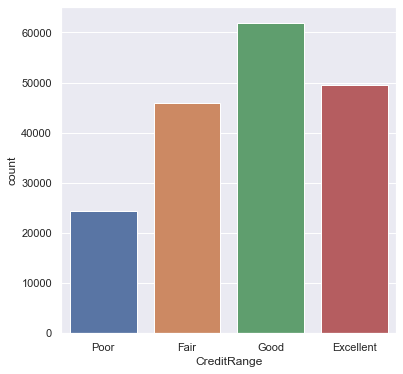

In [186]:
plt.figure(figsize=(6,6))
sns.countplot(x='CreditRange',data=df)
plt.show()

In [187]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use


In [188]:
df.select_dtypes('number').columns.to_list()

['MSA',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'OrigInterestRate',
 'OrigLoanTerm',
 'NumBorrowers',
 'EverDelinquent',
 'MonthsDelinquent',
 'IsFirstTimeHomebuyer',
 'Month_Difference']

In [189]:
# num = df.select_dtypes('number').columns.to_list()
# BM_num =df[num]
# for numeric in BM_num[num[:14]]:
#     plt.scatter(BM_num[numeric], BM_num['EverDelinquent'])
#     plt.title("Scatter Plot", fontsize=20) 
#     plt.xlabel(numeric)
#     plt.ylabel('EverDelinquent')
#     plt.show()

In [190]:
# plt.figure(figsize=(10,5))
# sns.barplot(x='MIP' ,y='EverDelinquent', data=df ,palette='YlOrRd')
# plt.xlabel('MIP', fontsize=14)
# plt.ylabel('EverDelinquent',fontsize=14)
# plt.legend()
# plt.title('Barplot', fontsize=20)
# plt.show()

In [191]:
# plt.figure(figsize=(10,5))
# sns.barplot(x='MonthsInRepayment' ,y='EverDelinquent', data=df ,palette='YlOrRd')
# plt.xlabel('MonthsInRepayment', fontsize=14)
# plt.ylabel('EverDelinquent',fontsize=14)
# plt.legend()
# plt.title('Barplot', fontsize=20)
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


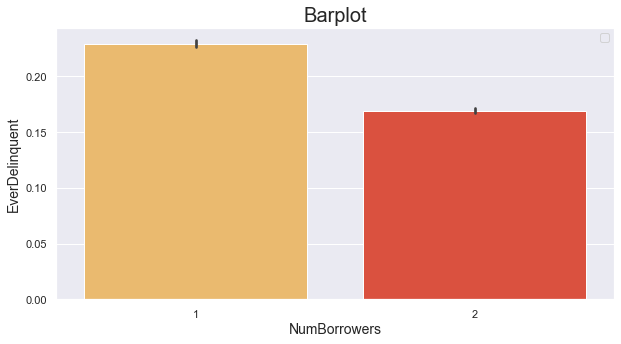

In [192]:
plt.figure(figsize=(10,5))
sns.barplot(x='NumBorrowers' ,y='EverDelinquent', data=df ,palette='YlOrRd')
plt.xlabel('NumBorrowers', fontsize=14)
plt.ylabel('EverDelinquent',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()

In [193]:
#  one Num of Borrowers are having more everdelinquent

## Correlation Matrix

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_6668\2388707966.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() ,cmap='rocket')


<Axes: >

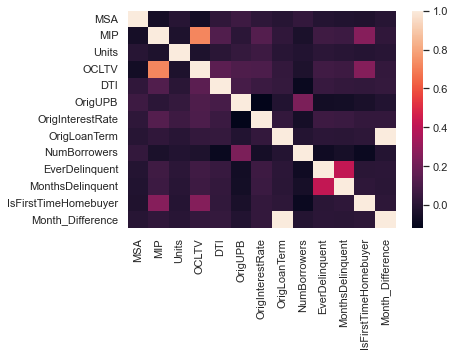

In [194]:
sns.heatmap(df.corr() ,cmap='rocket')

we can see 'LTV' & 'OCLTV' column  is highly correlated with 'MIP'[mortgage insurance premium]

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_6668\430777163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


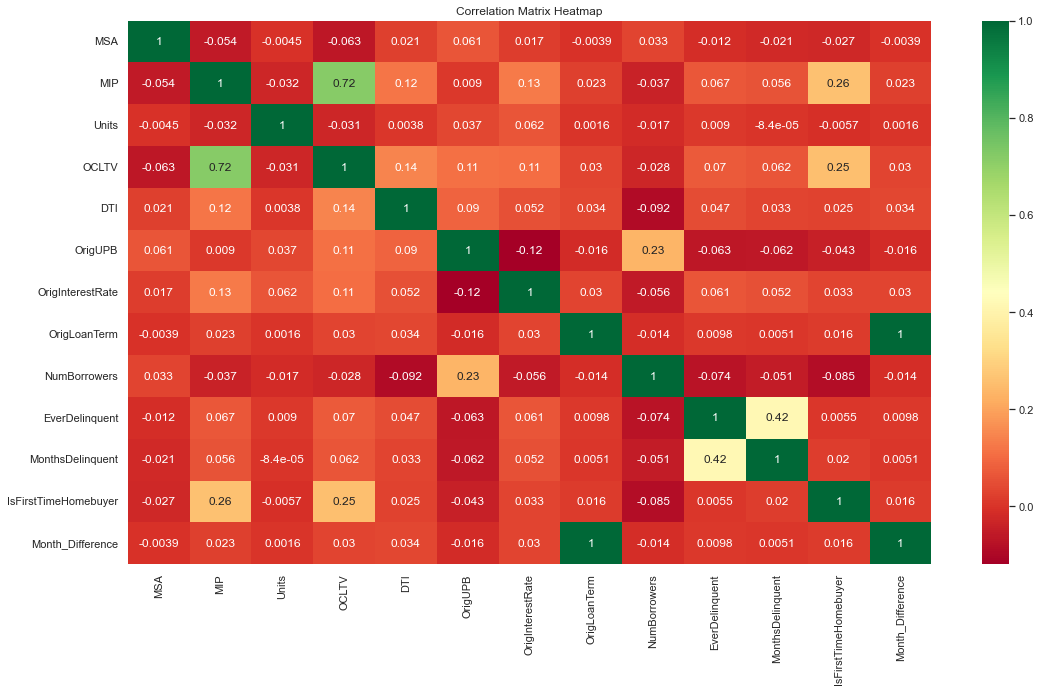

In [195]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(18, 10))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

# Add title and show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [196]:
 df.select_dtypes('object').columns.to_list()

['Occupancy',
 'Channel',
 'PPM',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanSeqNum',
 'LoanPurpose',
 'SellerName',
 'ServicerName',
 'LTV_Range',
 'CreditRange',
 'RepPayRange']

In [197]:
 df.select_dtypes('number').columns.to_list()

['MSA',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'OrigInterestRate',
 'OrigLoanTerm',
 'NumBorrowers',
 'EverDelinquent',
 'MonthsDelinquent',
 'IsFirstTimeHomebuyer',
 'Month_Difference']

In [198]:
df['Occupancy'].unique()

array(['O', 'S', 'I'], dtype=object)

In [199]:
df.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange,Month_Difference
0,16974,25,1,O,89,27,117000,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,0,Very High,Poor,4-8yrs,359
1,19740,0,1,O,73,17,109000,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,0,High,Poor,12-16yrs,359
2,29940,0,1,O,75,16,88000,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,0,Very High,Poor,4-8yrs,359
3,31084,0,1,O,76,14,160000,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,0,Very High,Poor,0-4yrs,359
4,35644,0,1,O,78,18,109000,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,0,Very High,Poor,4-8yrs,359


# Data Pre- Processing


### Numeric values:

      we can drop irrelevant columns "FirstPaymentDate","MaturityDate",


### Categorical values:
     
     we can drop irelevant columns "PostalCode","LoanSeqNum","ProductType"

In [200]:
# Dropping irrelevant columns

df.drop(['PostalCode','LoanSeqNum',"ProductType"],axis=1, inplace=True)


In [201]:
df

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange,Month_Difference
0,16974,25,1,O,89,27,117000,6.750,T,N,IL,SF,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,0,Very High,Poor,4-8yrs,359
1,19740,0,1,O,73,17,109000,6.500,R,N,CO,SF,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,0,High,Poor,12-16yrs,359
2,29940,0,1,O,75,16,88000,6.875,T,N,KS,SF,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,0,Very High,Poor,4-8yrs,359
3,31084,0,1,O,76,14,160000,6.875,R,N,CA,SF,N,360,2,GM,GMACMTGECORP,0,0,0,Very High,Poor,0-4yrs,359
4,35644,0,1,O,78,18,109000,7.125,R,N,NJ,SF,N,360,2,GM,GMACMTGECORP,0,0,0,Very High,Poor,4-8yrs,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,37964,0,1,O,60,32,90000,7.000,R,N,PA,SF,N,360,2,Ot,Other servicers,0,0,0,High,Excellent,0-4yrs,359
291447,35644,0,1,O,73,0,267000,6.375,C,N,NY,SF,P,319,2,Ot,Other servicers,0,0,0,High,Excellent,4-8yrs,318
291448,42044,0,1,O,73,31,87000,5.625,R,N,CA,SF,N,313,1,Ot,Other servicers,0,0,0,High,Excellent,0-4yrs,312
291449,37964,0,1,I,80,54,88000,7.000,R,N,PA,SF,P,360,2,Ot,Other servicers,0,0,0,Very High,Excellent,0-4yrs,359


## Label Encoding

In [202]:
df.select_dtypes('object').columns.to_list()

['Occupancy',
 'Channel',
 'PPM',
 'PropertyState',
 'PropertyType',
 'LoanPurpose',
 'SellerName',
 'ServicerName',
 'LTV_Range',
 'CreditRange',
 'RepPayRange']

In [203]:
df["PPM"].unique()

array(['N', 'Y'], dtype=object)

In [204]:
df["PropertyType"].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH', 'X '], dtype=object)

In [205]:
df["ServicerName"].unique()

array(['WASHINGTONMUTUALBANK', 'CHASEHOMEFINANCELLC ',
       'GMACMTGECORP        ', 'WELLSFARGOBANKNA   ',
       'Other servicers     ', 'ABNAMROMTGEGROUPINC',
       'BANKOFAMERICANA    ', 'CHASEMANHATTANMTGECO',
       'HOMESIDELENDINGINC ', 'CHASEMTGECO         ',
       'WELLSFARGOHOMEMORTGA', 'PRINCIPALRESIDENTIAL',
       'CITIMORTGAGEINC    ', 'JPMORGANCHASEBANKNA',
       'BAMORTGAGELLC      ', 'NATLCITYMTGECO      ',
       'FTMTGESERVICESINC  ', 'SUNTRUSTMORTGAGEINC',
       'FIFTHTHIRDBANK      ', 'COUNTRYWIDE         '], dtype=object)

In [206]:
df["SellerName"].unique()

array(['FL', 'FT', 'GM', 'Ot', 'ST', 'CR', 'CH', 'FI', 'HO', 'PR', 'NO',
       'PN', 'WA', 'BA', 'G ', 'OL', 'AC', 'RE', 'CO', 'BI'], dtype=object)

In [207]:
df["PropertyState"].unique()

array(['IL', 'CO', 'KS', 'CA', 'NJ', 'GA', 'TX', 'MD', 'MA', 'SC', 'WY',
       'NC', 'AZ', 'FL', 'IN', 'MS', 'CT', 'NY', 'WA', 'AR', 'VA', 'WI',
       'MN', 'LA', 'PA', 'OR', 'RI', 'UT', 'MI', 'OH', 'NE', 'AL', 'VT',
       'HI', 'MO', 'TN', 'NV', 'PR', 'KY', 'ME', 'NH', 'NM', 'ID', 'IA',
       'MT', 'OK', 'DC', 'WV', 'ND', 'DE', 'SD', 'AK'], dtype=object)

In [208]:
df['Channel'].unique()

array(['T', 'R', 'C', 'B'], dtype=object)

In [209]:
df['Occupancy'].unique()

array(['O', 'S', 'I'], dtype=object)

In [210]:
df.columns

Index(['MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB',
       'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'SellerName',
       'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'IsFirstTimeHomebuyer', 'LTV_Range', 'CreditRange', 'RepPayRange',
       'Month_Difference'],
      dtype='object')

In [211]:
encoder=LabelEncoder()

In [212]:
df['PPM']= encoder.fit_transform(df['PPM'])
df['LoanPurpose']= encoder.fit_transform(df['LoanPurpose'])
df['PropertyState']= encoder.fit_transform(df['PropertyState'])
df['ServicerName']= encoder.fit_transform(df['ServicerName'])
df['PropertyType']= encoder.fit_transform(df['PropertyType'])
df['Channel']= encoder.fit_transform(df['Channel'])
df['SellerName']= encoder.fit_transform(df['SellerName'])
df['LTV_Range']= encoder.fit_transform(df['LTV_Range'])
df['DTI']= encoder.fit_transform(df['DTI'])
df['CreditRange']= encoder.fit_transform(df['CreditRange'])
df['MIP']= encoder.fit_transform(df['MIP'])
df['RepPayRange']= encoder.fit_transform(df['RepPayRange'])
df['Month_Difference']= encoder.fit_transform(df['Month_Difference'])

In [213]:
df.shape

(181686, 24)

In [214]:
df.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange,Month_Difference
0,16974,18,1,O,89,27,117000,6.750,3,0,14,5,2,360,2,7,17,0,0,0,0,3,3,59
1,19740,0,1,O,73,17,109000,6.500,2,0,5,5,1,360,1,8,3,0,0,0,1,3,1,59
2,29940,0,1,O,75,16,88000,6.875,3,0,16,5,1,360,2,7,17,0,0,0,0,3,3,59
3,31084,0,1,O,76,14,160000,6.875,2,0,4,5,1,360,2,10,10,0,0,0,0,3,0,59
4,35644,0,1,O,78,18,109000,7.125,2,0,31,5,1,360,2,10,10,0,0,0,0,3,3,59


## One Hot Encoding

In [215]:
df.columns

Index(['MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB',
       'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'SellerName',
       'ServicerName', 'EverDelinquent', 'MonthsDelinquent',
       'IsFirstTimeHomebuyer', 'LTV_Range', 'CreditRange', 'RepPayRange',
       'Month_Difference'],
      dtype='object')

In [216]:
df_city = pd.get_dummies(df['Occupancy'],drop_first = True)

In [217]:
df=pd.concat([df,df_city],axis=1)

In [218]:
# Display the encoded DataFrame
df.head()

,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange,Month_Difference,O,S
0,16974,18,1,O,89,27,117000,6.750,3,0,14,5,2,360,2,7,17,0,0,0,0,3,3,59,1,0
1,19740,0,1,O,73,17,109000,6.500,2,0,5,5,1,360,1,8,3,0,0,0,1,3,1,59,1,0
2,29940,0,1,O,75,16,88000,6.875,3,0,16,5,1,360,2,7,17,0,0,0,0,3,3,59,1,0
3,31084,0,1,O,76,14,160000,6.875,2,0,4,5,1,360,2,10,10,0,0,0,0,3,0,59,1,0
4,35644,0,1,O,78,18,109000,7.125,2,0,31,5,1,360,2,10,10,0,0,0,0,3,3,59,1,0


In [219]:
df.drop('Occupancy',axis=1,inplace=True)

In [220]:
df.head()

,MSA,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange,Month_Difference,O,S
0,16974,18,1,89,27,117000,6.750,3,0,14,5,2,360,2,7,17,0,0,0,0,3,3,59,1,0
1,19740,0,1,73,17,109000,6.500,2,0,5,5,1,360,1,8,3,0,0,0,1,3,1,59,1,0
2,29940,0,1,75,16,88000,6.875,3,0,16,5,1,360,2,7,17,0,0,0,0,3,3,59,1,0
3,31084,0,1,76,14,160000,6.875,2,0,4,5,1,360,2,10,10,0,0,0,0,3,0,59,1,0
4,35644,0,1,78,18,109000,7.125,2,0,31,5,1,360,2,10,10,0,0,0,0,3,3,59,1,0


In [221]:
df.shape

(181686, 25)

In [222]:
# IN EDA DATA NEED TO BE TRANSFORM IN DIFF FORM
# IN EDA Need to create some new variable that we can use in some feature engg work after EDA

In [223]:
df["EverDelinquent"].value_counts()

0    146979
1     34707
Name: EverDelinquent, dtype: int64

CreditSCORE- Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900)(credit range column)

LTV -  Low','Medium','High (LTV range column)

Monthsin repayment - 0-4yrs','4-8yrs','8-12yrs', '12-16yrs', '16-20yr(Column name - Repayrange)

In [224]:
df["EverDelinquent"].value_counts()

0    146979
1     34707
Name: EverDelinquent, dtype: int64

# Feature Engineering

#  Feature Selection

<!-- Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features Dataset.
 -->

#  1. Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated

## Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [225]:
# import seaborn as sns
# #Using Pearson Correlation
# plt.figure(figsize=(25,15))
# cor = df.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

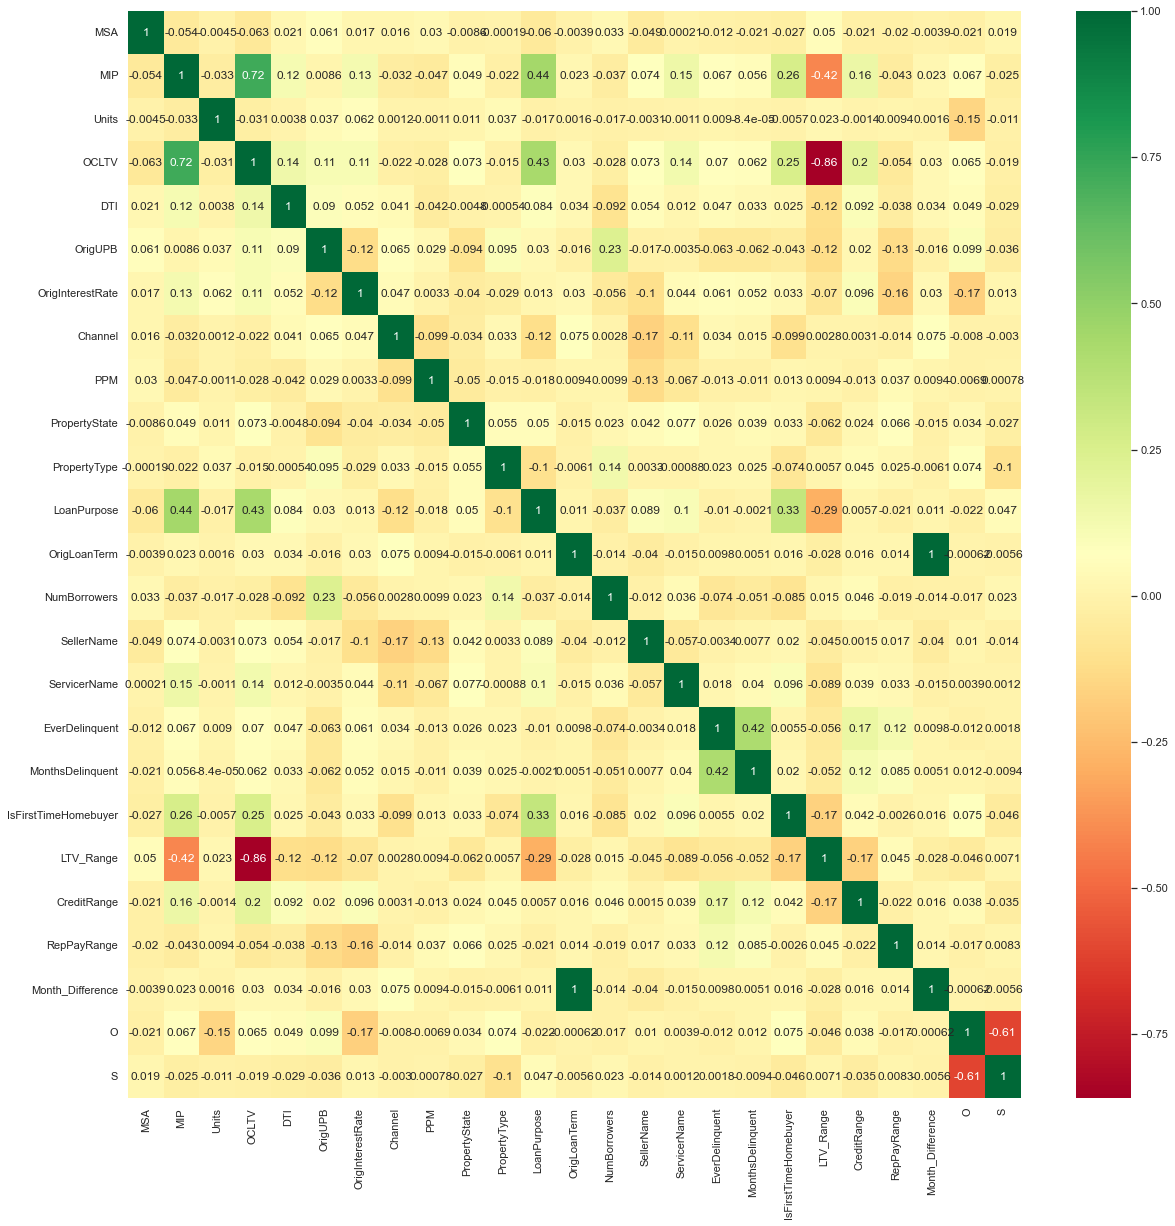

In [226]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

As from above correlation plot OrigLoanTerm and Month_Difference is Highly correlated so we have to remove one of the column


In [227]:
df.drop(['OrigLoanTerm'],axis=1, inplace=True)

In [228]:
# X=df.drop("EverDelinquent",axis=1)
# Y=df["EverDelinquent"]

# 2. Mutual Information Score

Mutual information is a measure of the mutual dependence between two random variables. It quantifies how much information one variable provides about another variable. In the context of feature selection, the mutual information score is used to assess the relevance of each feature (or variable) with respect to the target variable. It helps determine how much information a particular feature provides about the target variable.  
Features with higher mutual information scores are considered more informative and potentially more important for predicting or understanding the target variable.

Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (mutual_info_regression) and one for categorical targets (mutual_info_classif).

In [229]:
x=df.drop(["EverDelinquent"],axis=1)
y=df["EverDelinquent"]

In [230]:
# To avoid ovefitting we are splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 1)

In [231]:
# importing library for mi score for classification 
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.005203  , 0.00649798, 0.02017674, 0.00534626, 0.00380238,
       0.00343895, 0.00377234, 0.00871337, 0.        , 0.00406324,
       0.02357737, 0.01055938, 0.02037343, 0.00593755, 0.01229779,
       0.48872789, 0.        , 0.00363236, 0.03612402, 0.02595099,
       0.01569185, 0.02015946, 0.        ])

In [232]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

MonthsDelinquent        0.488728
CreditRange             0.036124
RepPayRange             0.025951
PropertyType            0.023577
NumBorrowers            0.020373
Units                   0.020177
O                       0.020159
Month_Difference        0.015692
ServicerName            0.012298
LoanPurpose             0.010559
Channel                 0.008713
MIP                     0.006498
SellerName              0.005938
OCLTV                   0.005346
MSA                     0.005203
PropertyState           0.004063
DTI                     0.003802
OrigInterestRate        0.003772
LTV_Range               0.003632
OrigUPB                 0.003439
IsFirstTimeHomebuyer    0.000000
PPM                     0.000000
S                       0.000000
dtype: float64

<Axes: >

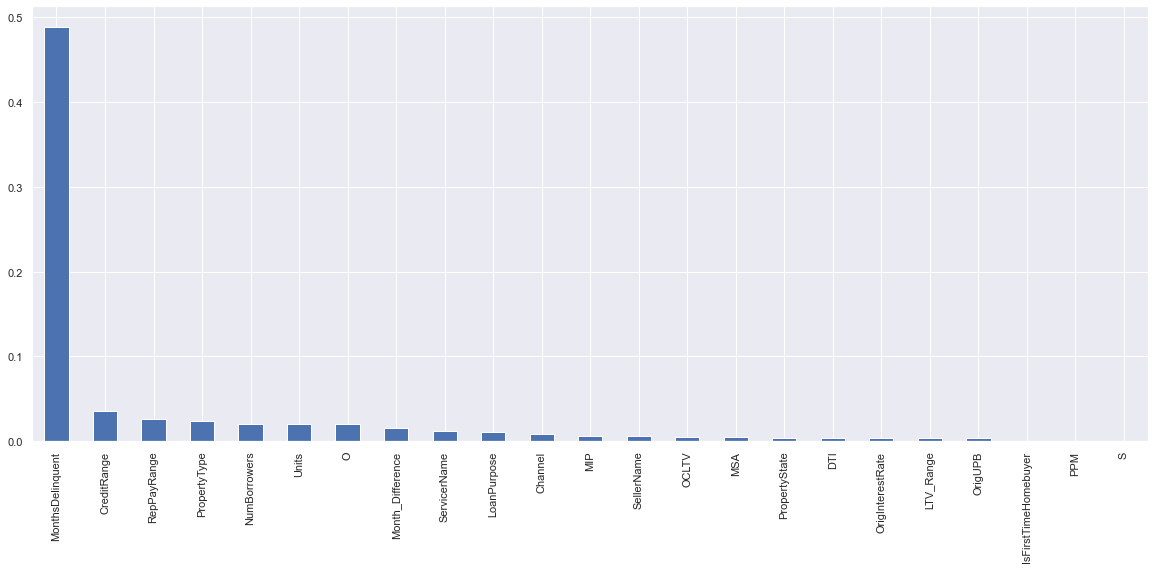

In [233]:
# plot of mi score for features
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [234]:
# For selecting best feature based on mi score
from sklearn.feature_selection import SelectKBest

In [235]:
#Now we Will select the  top 10 important features
sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit(x_train, y_train)
col = x_train.columns[sel_ten_cols.get_support()]

From on the basis mutual information score, we select top 10 features which affects our Target Variable

In [236]:
list(col)

['Units',
 'Channel',
 'PropertyType',
 'NumBorrowers',
 'ServicerName',
 'MonthsDelinquent',
 'CreditRange',
 'RepPayRange',
 'Month_Difference',
 'O']

In [237]:
x

,MSA,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,NumBorrowers,SellerName,ServicerName,MonthsDelinquent,IsFirstTimeHomebuyer,LTV_Range,CreditRange,RepPayRange,Month_Difference,O,S
0,16974,18,1,89,27,117000,6.750,3,0,14,5,2,2,7,17,0,0,0,3,3,59,1,0
1,19740,0,1,73,17,109000,6.500,2,0,5,5,1,1,8,3,0,0,1,3,1,59,1,0
2,29940,0,1,75,16,88000,6.875,3,0,16,5,1,2,7,17,0,0,0,3,3,59,1,0
3,31084,0,1,76,14,160000,6.875,2,0,4,5,1,2,10,10,0,0,0,3,0,59,1,0
4,35644,0,1,78,18,109000,7.125,2,0,31,5,1,2,10,10,0,0,0,3,3,59,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,37964,0,1,60,32,90000,7.000,2,0,38,5,1,2,14,14,0,0,1,0,0,59,1,0
291447,35644,0,1,73,0,267000,6.375,1,0,34,5,2,2,14,14,0,0,1,0,3,18,1,0
291448,42044,0,1,73,31,87000,5.625,2,0,4,5,1,1,14,14,0,0,1,0,0,12,1,0
291449,37964,0,1,80,54,88000,7.000,2,0,38,5,2,2,14,14,0,0,0,0,0,59,0,0


In [238]:
#dropping all the columns which are less important towards output variable.
x = df.drop(columns =["OCLTV","PropertyState","MIP","SellerName","IsFirstTimeHomebuyer","DTI","S","LTV_Range","MSA","PPM","Channel","OrigInterestRate"],axis=1, inplace=True)


In [239]:
df

,Units,OrigUPB,PropertyType,LoanPurpose,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,CreditRange,RepPayRange,Month_Difference,O
0,1,117000,5,2,2,17,0,0,3,3,59,1
1,1,109000,5,1,1,3,0,0,3,1,59,1
2,1,88000,5,1,2,17,0,0,3,3,59,1
3,1,160000,5,1,2,10,0,0,3,0,59,1
4,1,109000,5,1,2,10,0,0,3,3,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...
291446,1,90000,5,1,2,14,0,0,0,0,59,1
291447,1,267000,5,2,2,14,0,0,0,3,18,1
291448,1,87000,5,1,1,14,0,0,0,0,12,1
291449,1,88000,5,2,2,14,0,0,0,0,59,0


In [240]:
X=df.drop("EverDelinquent",axis=1)
Y=df["EverDelinquent"]

# Principal Components Analysis

In [241]:
# We will use StandardScaler for scaling 
from sklearn.preprocessing import StandardScaler

In [242]:
scaler = StandardScaler()

In [243]:
scaler_fit = scaler.fit_transform(X)

In [244]:
X=pd.DataFrame(scaler_fit, columns = X.columns)

In [245]:
X

,Units,OrigUPB,PropertyType,LoanPurpose,NumBorrowers,ServicerName,MonthsDelinquent,CreditRange,RepPayRange,Month_Difference,O
0,-0.10736,-0.234655,0.360233,0.828344,0.760010,1.258313,-0.202988,1.633743,1.001131,0.065528,0.188513
1,-0.10736,-0.384677,0.360233,-0.529015,-1.315773,-1.110006,-0.202988,1.633743,-0.305692,0.065528,0.188513
2,-0.10736,-0.778485,0.360233,-0.529015,0.760010,1.258313,-0.202988,1.633743,1.001131,0.065528,0.188513
3,-0.10736,0.571713,0.360233,-0.529015,0.760010,0.074154,-0.202988,1.633743,-0.959103,0.065528,0.188513
4,-0.10736,-0.384677,0.360233,-0.529015,0.760010,0.074154,-0.202988,1.633743,1.001131,0.065528,0.188513
...,...,...,...,...,...,...,...,...,...,...,...
181681,-0.10736,-0.740979,0.360233,-0.529015,0.760010,0.750816,-0.202988,-1.313350,-0.959103,0.065528,0.188513
181682,-0.10736,2.578256,0.360233,0.828344,0.760010,0.750816,-0.202988,-1.313350,1.001131,-19.124746,0.188513
181683,-0.10736,-0.797237,0.360233,-0.529015,-1.315773,0.750816,-0.202988,-1.313350,-0.959103,-21.933079,0.188513
181684,-0.10736,-0.778485,0.360233,0.828344,0.760010,0.750816,-0.202988,-1.313350,-0.959103,0.065528,-5.304686


In [246]:
df.shape

(181686, 12)

In [247]:
X.shape

(181686, 11)

## PCA

In [248]:
from sklearn.decomposition import PCA

In [249]:
pca = PCA()
pca.fit_transform(X)

array([[-0.379049  ,  1.45577871, -0.37295351, ..., -1.31932281,
         0.0669414 ,  0.19388449],
       [ 0.38425076,  0.56739971,  0.15044075, ..., -1.19419156,
        -0.29078567, -0.60173598],
       [-0.20875722,  1.66311744,  0.29804454, ..., -1.04290089,
         0.45088467,  0.32324236],
       ...,
       [-0.45641635, -1.85383979, -0.37096617, ..., -1.65408625,
        -0.97236912, -0.00405326],
       [ 1.17098823, -2.26217738,  1.87829758, ...,  1.56787104,
        -2.64563221, -0.95738601],
       [ 0.05440282, -0.65101125, -0.58020773, ...,  0.73661556,
        -1.14325232,  1.40589492]])

In [250]:
principalComponents = pca.fit_transform(X)

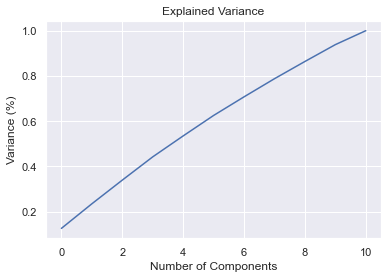

In [251]:
# For choosing number Principal Components I have plotted scree plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

From the above graph about 90 % variance is shown  by approximately 9 principal components

So we will use 9 derived features for our training model.

In [252]:
new_data = pd.DataFrame(principalComponents)

In [253]:
new_data

,0,1,2,3,4,5,6,7,8,9,10
0,-0.379049,1.455779,-0.372954,1.340434,0.415515,-0.459986,-0.531942,-0.383634,-1.319323,0.066941,0.193884
1,0.384251,0.567400,0.150441,-0.988456,-1.476332,0.852608,0.052402,-0.353335,-1.194192,-0.290786,-0.601736
2,-0.208757,1.663117,0.298045,0.544932,0.436408,-0.288158,-0.843709,-1.168114,-1.042901,0.450885,0.323242
3,-1.489479,0.478504,-0.099898,0.196853,-1.043389,0.548272,-0.631283,-0.736827,-0.398500,0.124073,0.003705
4,-0.445535,1.328297,0.522927,-0.023646,-0.045260,-0.135792,-0.916509,-0.329260,-1.225983,0.392659,0.204117
...,...,...,...,...,...,...,...,...,...,...,...
181681,-0.320555,-0.578145,0.002365,-0.292573,0.708998,-0.314753,0.079168,-1.100777,1.132109,-0.469505,0.996443
181682,-2.812559,-1.592687,-0.489835,1.198200,11.761378,14.548598,0.287362,3.296717,-1.735171,0.274347,-1.012193
181683,-0.456416,-1.853840,-0.370966,-0.305941,12.216922,18.140566,0.609674,0.932937,-1.654086,-0.972369,-0.004053
181684,1.170988,-2.262177,1.878298,2.631118,0.500940,-0.341411,-2.328865,-0.547769,1.567871,-2.645632,-0.957386


In [254]:
# We will use 9 principal components
pca = PCA(n_components=9)
## This will be the new data fed to the algorithm.
final_data = pca.fit_transform(new_data)
principal_Df = pd.DataFrame(data = final_data
             , columns = ['PC1','PC2','PC3','PC4','PC5',"P6","P7","P8","P9"])

In [255]:
principal_Df

,PC1,PC2,PC3,PC4,PC5,P6,P7,P8,P9
0,-0.379049,1.455779,-0.372954,1.340434,0.415515,-0.459986,-0.531942,-0.383634,-1.319323
1,0.384251,0.567400,0.150441,-0.988456,-1.476332,0.852608,0.052402,-0.353335,-1.194192
2,-0.208757,1.663117,0.298045,0.544932,0.436408,-0.288158,-0.843709,-1.168114,-1.042901
3,-1.489479,0.478504,-0.099898,0.196853,-1.043389,0.548272,-0.631283,-0.736827,-0.398500
4,-0.445535,1.328297,0.522927,-0.023646,-0.045260,-0.135792,-0.916509,-0.329260,-1.225983
...,...,...,...,...,...,...,...,...,...
181681,-0.320555,-0.578145,0.002365,-0.292573,0.708998,-0.314753,0.079168,-1.100777,1.132109
181682,-2.812559,-1.592687,-0.489835,1.198200,11.761378,14.548598,0.287362,3.296717,-1.735171
181683,-0.456416,-1.853840,-0.370966,-0.305941,12.216922,18.140566,0.609674,0.932937,-1.654086
181684,1.170988,-2.262177,1.878298,2.631118,0.500940,-0.341411,-2.328865,-0.547769,1.567871


In [256]:
principal_Df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'P6', 'P7', 'P8', 'P9'], dtype='object')

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

In [258]:
X = principal_Df
Y = df["EverDelinquent"]

In [259]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [260]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [261]:
Y_pred = lr.predict(X_test)

In [262]:
# Training Accuracy
accuracy_score(Y_train,lr.predict(X_train))

0.9372071080358547

In [263]:
# Testing accuracy
Acc_1 = accuracy_score(Y_test,Y_pred)
Acc_1

0.9359520052838219

In [264]:
Report = classification_report(Y_test,Y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     43994
           1       0.90      0.75      0.82     10512

    accuracy                           0.94     54506
   macro avg       0.92      0.86      0.89     54506
weighted avg       0.93      0.94      0.93     54506



## Random Forest Classifier

In [265]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [266]:
# Training Accuracy
accuracy_score(Y_train,rfc.predict(X_train))

1.0

In [267]:
# Testing Accuracy
Acc_2 = accuracy_score(Y_test, rfc.predict(X_test))
Acc_2

0.9542252229112391

In [268]:
Report_ = classification_report(Y_test, rfc.predict(X_test))
print(Report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     43994
           1       0.90      0.75      0.82     10512

    accuracy                           0.94     54506
   macro avg       0.92      0.86      0.89     54506
weighted avg       0.93      0.94      0.93     54506



In [269]:
print('Logistics Regression Accuracy ', Acc_1)
print('Random Forest Classifier Accuracy ', Acc_2)

Logistics Regression Accuracy  0.9359520052838219
Random Forest Classifier Accuracy  0.9542252229112391


In [270]:
# data = df.to_csv(r"C:\Users\vibgyors computer\OneDrive\Desktop\Project\Technocolabs\Mortage backed loan\Feature_Engg.csv",)